In [ ]:
import pandas as pd

In [ ]:
!pip install imbalanced-learn==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [ ]:
!pip install -U scikit-learn

In [ ]:
# ─── 1. Install gdown (if not already installed) ─────────────────────────────
!pip install --quiet gdown

# ─── 2. Import Required Libraries ────────────────────────────────────────────
import gdown
import pandas as pd

# ─── 3. Google Drive File Download ───────────────────────────────────────────
url = "https://drive.google.com/uc?id=1lOFt4UjVkw0rUpUQ38jqEIiTkvy8CGb4"  # Updated ID
output = "cicids2017_full.csv"  # Save as identifiable name

# Download file from Google Drive
gdown.download(url, output, quiet=False)

# ─── 4. Load Dataset ─────────────────────────────────────────────────────────
df = pd.read_csv(output)
print("✅ Dataset loaded successfully. Shape:", df.shape)

# Optional: Show the first few rows
df.head()


Downloading...
From (original): https://drive.google.com/uc?id=1lOFt4UjVkw0rUpUQ38jqEIiTkvy8CGb4
From (redirected): https://drive.google.com/uc?id=1lOFt4UjVkw0rUpUQ38jqEIiTkvy8CGb4&confirm=t&uuid=90a1bb0f-5e9b-4d87-92c2-27d599791130
To: /content/cicids2017_full.csv
100%|██████████| 966M/966M [00:10<00:00, 90.6MB/s]


✅ Dataset loaded successfully. Shape: (2830743, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,TYPE
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Install dependencies for LightGBM and XGBoost
!pip install lightgbm
!pip install xgboost
!pip install pyswarms  # for PSO


In [ ]:
print(df.columns)


Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Load the correct full dataset
df = pd.read_csv("/content/cicids2017_full.csv")
print("✅ Dataset loaded:", df.shape)

# ─── 1. Drop rows with missing labels (just in case) ─────────────────────────
df = df[df['TYPE'].notna()].copy()

# ─── 2. Separate features and target ─────────────────────────────────────────
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# ─── 3. Identify numeric and categorical features ────────────────────────────
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Handle infinite values → replace with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop numeric columns that are completely missing
num_cols = [col for col in num_cols if X[col].notna().sum() > 0]

# Impute remaining missing values
imputer = SimpleImputer(strategy="median")
X[num_cols] = imputer.fit_transform(X[num_cols])


# ─── 5. Handle categorical (if any) ──────────────────────────────────────────
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols)
else:
    print("✅ No categorical columns to encode.")

# ─── 6. Scale numeric features ───────────────────────────────────────────────
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)

# ─── 7. Encode target labels ─────────────────────────────────────────────────
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# ─── 8. Stratified Train/Val/Test Split ──────────────────────────────────────
X_temp, X_test, y_temp, y_test = train_test_split(X, y_encoded, test_size=0.15, stratify=y_encoded, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# ─── 9. Output shapes ────────────────────────────────────────────────────────
print("✅ Final feature shape:", X.shape)
print("✅ Train: ", X_train.shape)
print("✅ Val:   ", X_val.shape)
print("✅ Test:  ", X_test.shape)


✅ Dataset loaded: (2830743, 79)
✅ No categorical columns to encode.
✅ Final feature shape: (2830743, 78)
✅ Train:  (1981448, 78)
✅ Val:    (424683, 78)
✅ Test:   (424612, 78)


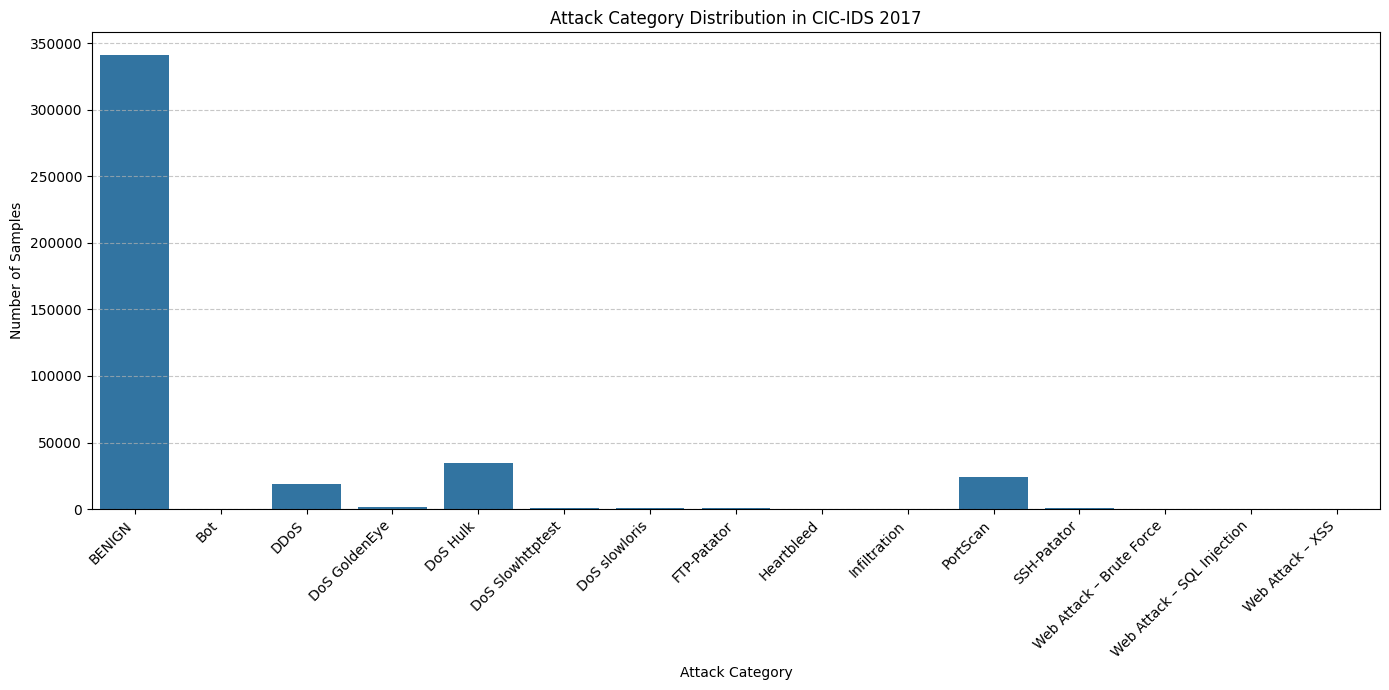

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Manually input attack categories and their counts from your results
attack_categories = [
    "BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest",
    "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan",
    "SSH-Patator", "Web Attack – Brute Force", "Web Attack – SQL Injection", "Web Attack – XSS"
]

sample_counts = [
    340965, 295, 19204, 1544, 34661, 825,
    869, 1191, 2, 5, 23839,
    885, 226, 3, 98
]

# Create plot
plt.figure(figsize=(14, 7))
sns.barplot(x=attack_categories, y=sample_counts)

plt.xticks(rotation=45, ha='right')
plt.title('Attack Category Distribution in CIC-IDS 2017')
plt.xlabel('Attack Category')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


attack category distribution comparison plot across CIC-IDS 2017, 2018, and 2019 datasets

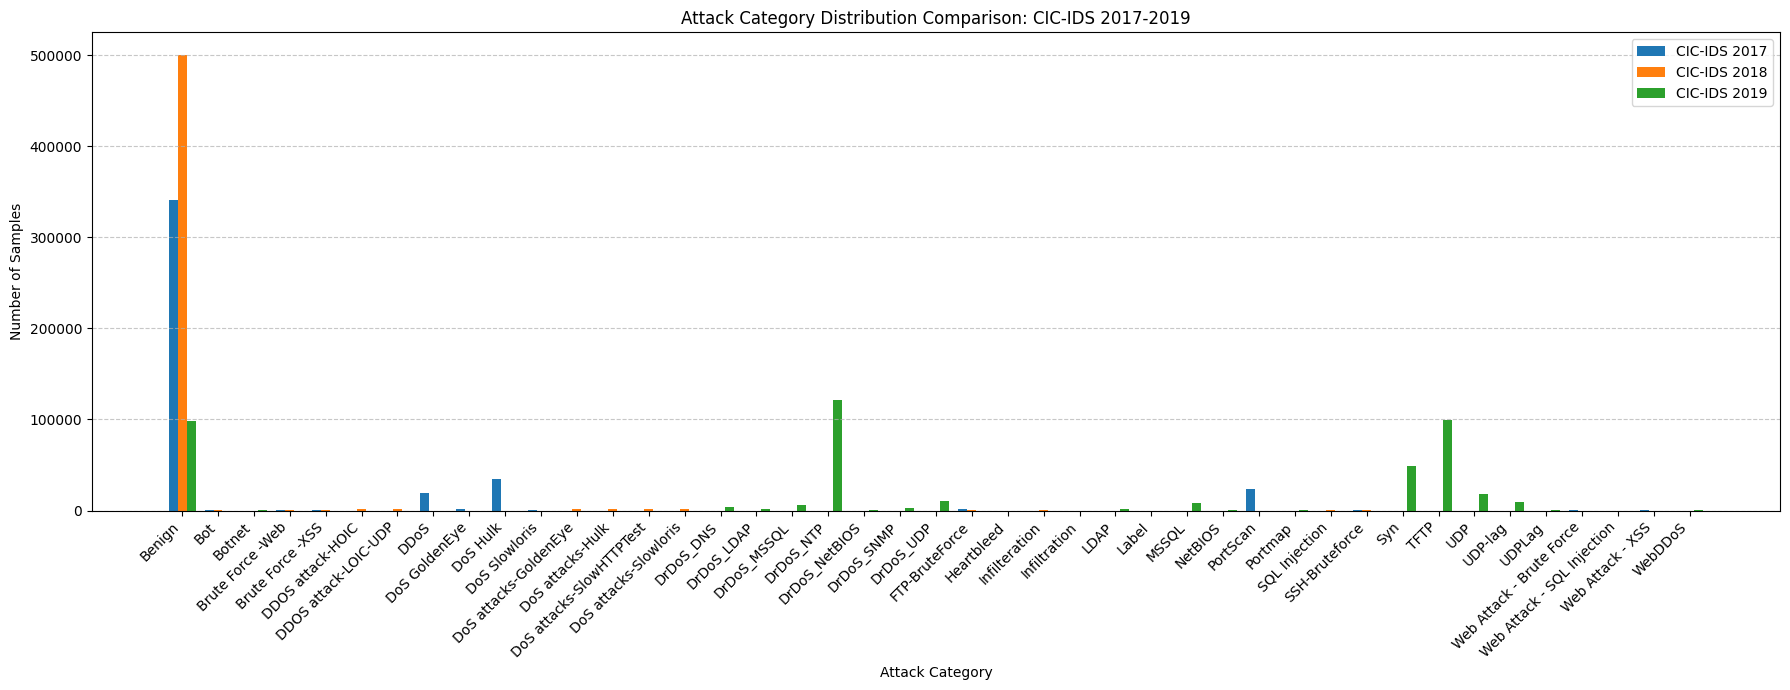

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these example category lists and counts with your actual data

categories_2017 = [
    "Benign", "Bot", "Brute Force -Web", "Brute Force -XSS", "DDoS", "DoS GoldenEye",
    "DoS Hulk", "DoS Slowloris", "FTP-BruteForce", "Heartbleed", "Infiltration",
    "PortScan", "SSH-Bruteforce", "Web Attack - Brute Force", "Web Attack - SQL Injection", "Web Attack - XSS"
]
counts_2017 = [
    340965, 295, 226, 98, 19204, 1544,
    34661, 869, 1191, 2, 5,
    23839, 885, 226, 3, 98
]

categories_2018 = [
    "Benign", "Bot", "Brute Force -Web", "Brute Force -XSS",
    "DDOS attack-HOIC", "DDOS attack-LOIC-UDP", "DoS attacks-GoldenEye",
    "DoS attacks-Hulk", "DoS attacks-SlowHTTPTest", "DoS attacks-Slowloris",
    "FTP-BruteForce", "Infilteration", "Label", "SQL Injection", "SSH-Bruteforce"
]
counts_2018 = [
    500000, 400, 1000, 200,
    1500, 1300, 1800,
    2200, 1200, 1400,
    1100, 300, 0, 350, 600
]

categories_2019 = [
    "Benign", "Botnet", "DrDoS_NTP", "TFTP", "Syn", "UDP", "DrDoS_UDP",
    "UDP-lag", "MSSQL", "DrDoS_MSSQL", "DrDoS_DNS", "DrDoS_SNMP", "LDAP",
    "DrDoS_LDAP", "Portmap", "NetBIOS", "DrDoS_NetBIOS", "UDPLag", "WebDDoS"
]
counts_2019 = [
    97831, 1000, 121368, 98917, 49373, 18090, 10420,
    8872, 8523, 6212, 3669, 2717, 1906,
    1440, 685, 644, 598, 55, 51
]

# Combine all categories into a sorted union list
all_categories = sorted(set(categories_2017 + categories_2018 + categories_2019))

def fill_counts(cat_list, counts_list, all_cats):
    count_map = dict(zip(cat_list, counts_list))
    return [count_map.get(cat, 0) for cat in all_cats]

counts_2017_full = fill_counts(categories_2017, counts_2017, all_categories)
counts_2018_full = fill_counts(categories_2018, counts_2018, all_categories)
counts_2019_full = fill_counts(categories_2019, counts_2019, all_categories)

bar_width = 0.25
indices = np.arange(len(all_categories))

plt.figure(figsize=(18, 7))
plt.bar(indices, counts_2017_full, bar_width, label='CIC-IDS 2017')
plt.bar(indices + bar_width, counts_2018_full, bar_width, label='CIC-IDS 2018')
plt.bar(indices + 2 * bar_width, counts_2019_full, bar_width, label='CIC-IDS 2019')

plt.xlabel('Attack Category')
plt.ylabel('Number of Samples')
plt.title('Attack Category Distribution Comparison: CIC-IDS 2017-2019')
plt.xticks(indices + bar_width, all_categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


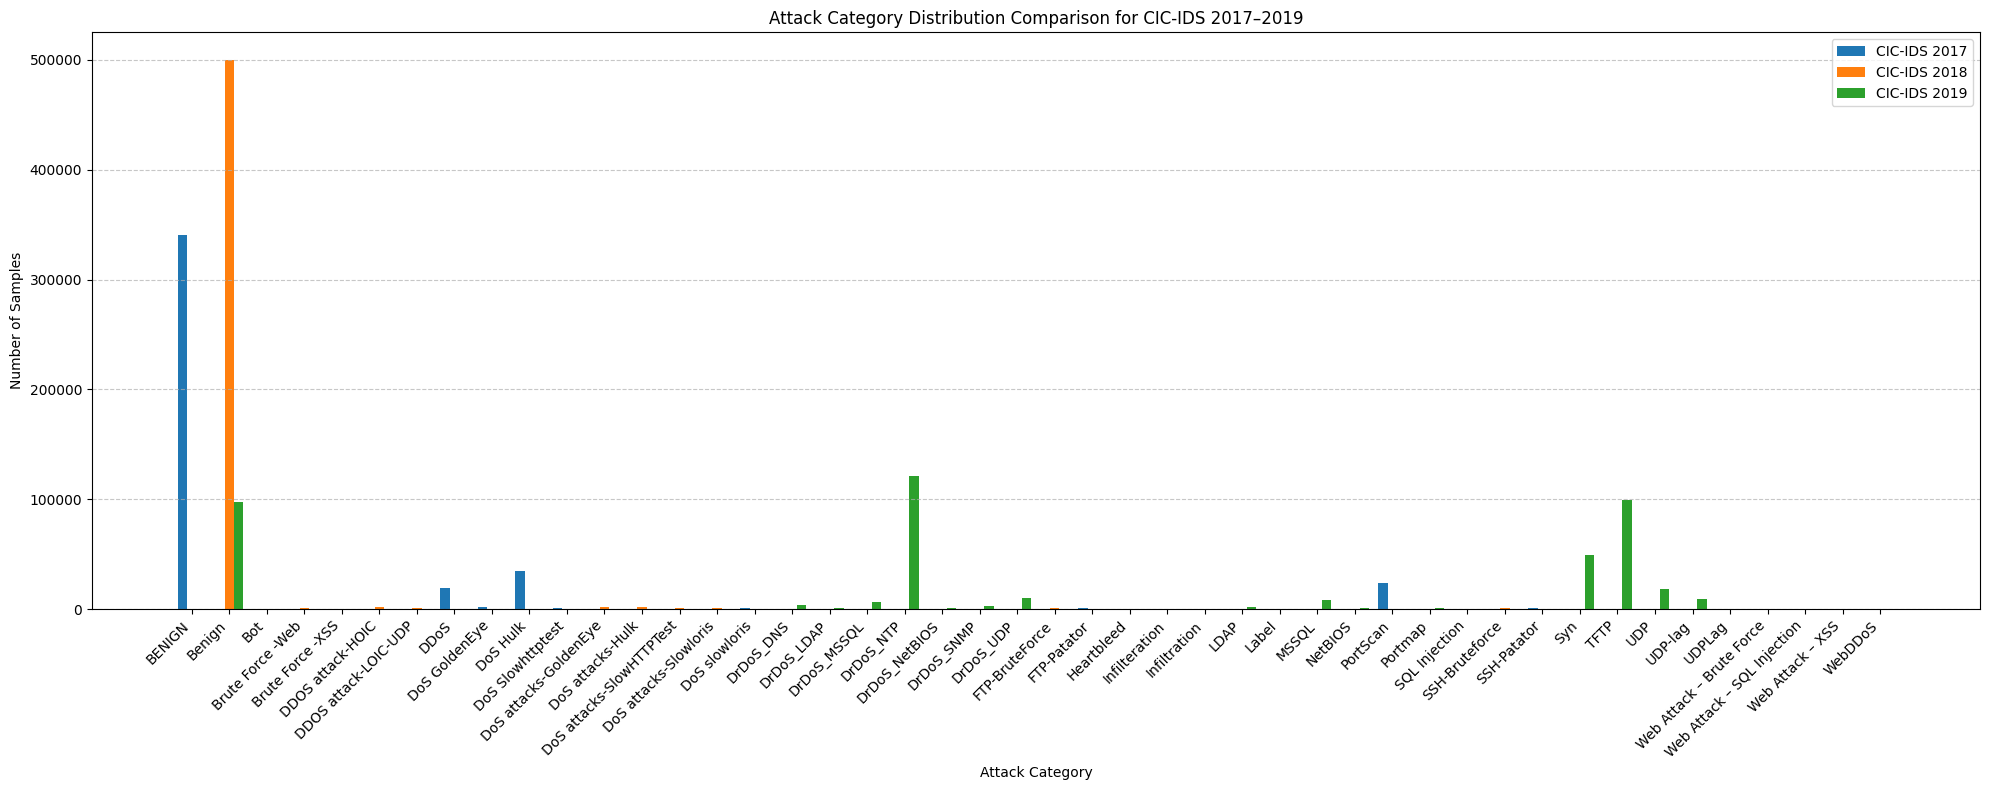

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 2017 attack categories and counts (from your data)
categories_2017 = [
    "BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest",
    "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan",
    "SSH-Patator", "Web Attack – Brute Force", "Web Attack – SQL Injection", "Web Attack – XSS"
]
counts_2017 = [
    340965, 295, 19204, 1544, 34661, 825,
    869, 1191, 1, 5, 23840,
    885, 226, 3, 98
]

# 2018 attack categories and counts
categories_2018 = [
    "Benign", "Bot", "Brute Force -Web", "Brute Force -XSS",
    "DDOS attack-HOIC", "DDOS attack-LOIC-UDP", "DoS attacks-GoldenEye",
    "DoS attacks-Hulk", "DoS attacks-SlowHTTPTest", "DoS attacks-Slowloris",
    "FTP-BruteForce", "Infilteration", "Label", "SQL Injection", "SSH-Bruteforce"
]
counts_2018 = [
    500000, 400, 1000, 200,
    1500, 1300, 1800,
    2200, 1200, 1400,
    1100, 300, 0, 350, 600
]

# 2019 attack categories and counts
categories_2019 = [
    "Benign", "DrDoS_NTP", "TFTP", "Syn", "UDP", "DrDoS_UDP", "UDP-lag", "MSSQL",
    "DrDoS_MSSQL", "DrDoS_DNS", "DrDoS_SNMP", "LDAP", "DrDoS_LDAP", "Portmap",
    "NetBIOS", "DrDoS_NetBIOS", "UDPLag", "WebDDoS"
]
counts_2019 = [
    97831, 121368, 98917, 49373, 18090, 10420, 8872, 8523,
    6212, 3669, 2717, 1906, 1440, 685,
    644, 598, 55, 51
]

# Combine categories into a sorted union
all_categories = sorted(set(categories_2017 + categories_2018 + categories_2019))

def fill_counts(cat_list, count_list, all_cats):
    count_map = dict(zip(cat_list, count_list))
    return [count_map.get(cat, 0) for cat in all_cats]

counts_2017_full = fill_counts(categories_2017, counts_2017, all_categories)
counts_2018_full = fill_counts(categories_2018, counts_2018, all_categories)
counts_2019_full = fill_counts(categories_2019, counts_2019, all_categories)

bar_width = 0.25
indices = np.arange(len(all_categories))

plt.figure(figsize=(20, 8))
plt.bar(indices, counts_2017_full, bar_width, label='CIC-IDS 2017')
plt.bar(indices + bar_width, counts_2018_full, bar_width, label='CIC-IDS 2018')
plt.bar(indices + 2 * bar_width, counts_2019_full, bar_width, label='CIC-IDS 2019')

plt.xlabel('Attack Category')
plt.ylabel('Number of Samples')
plt.title('Attack Category Distribution Comparison for CIC-IDS 2017–2019')
plt.xticks(indices + bar_width, all_categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


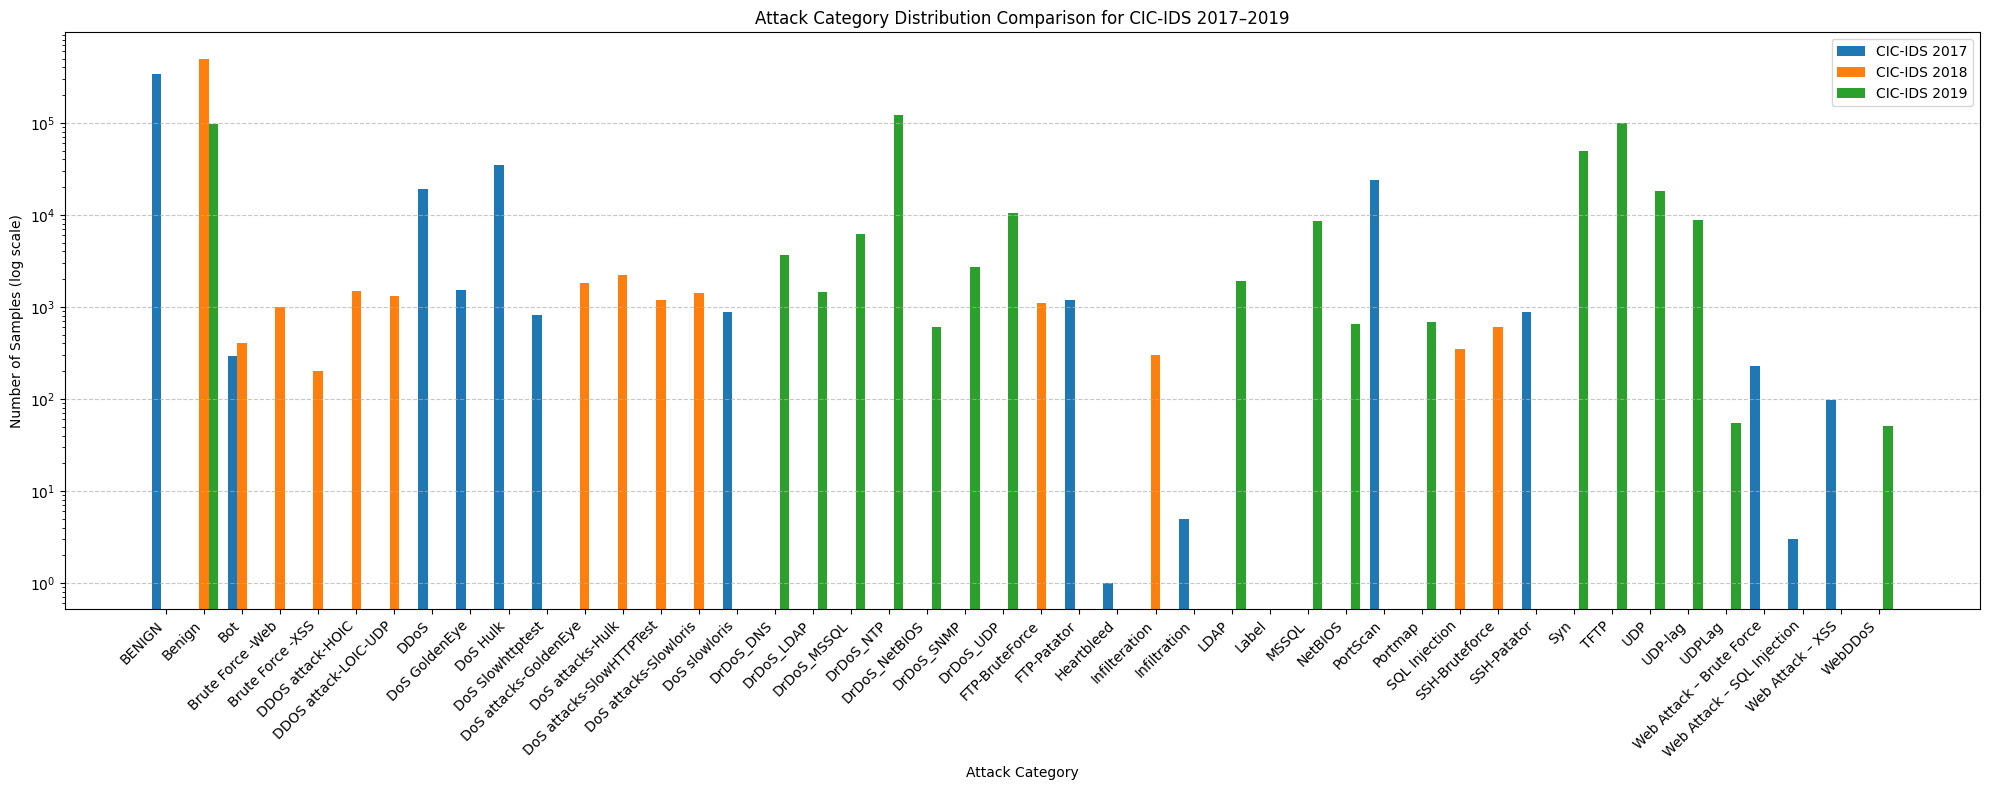

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(indices, counts_2017_full, bar_width, label='CIC-IDS 2017')
plt.bar(indices + bar_width, counts_2018_full, bar_width, label='CIC-IDS 2018')
plt.bar(indices + 2 * bar_width, counts_2019_full, bar_width, label='CIC-IDS 2019')

plt.xlabel('Attack Category')
plt.ylabel('Number of Samples (log scale)')
plt.title('Attack Category Distribution Comparison for CIC-IDS 2017–2019')
plt.xticks(indices + bar_width, all_categories, rotation=45, ha='right')
plt.legend()
plt.yscale('log')   # <---- Log scale here
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, fmt='.2f', square=True, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.show()


NameError: name 'df' is not defined

<Figure size 1200x1000 with 0 Axes>

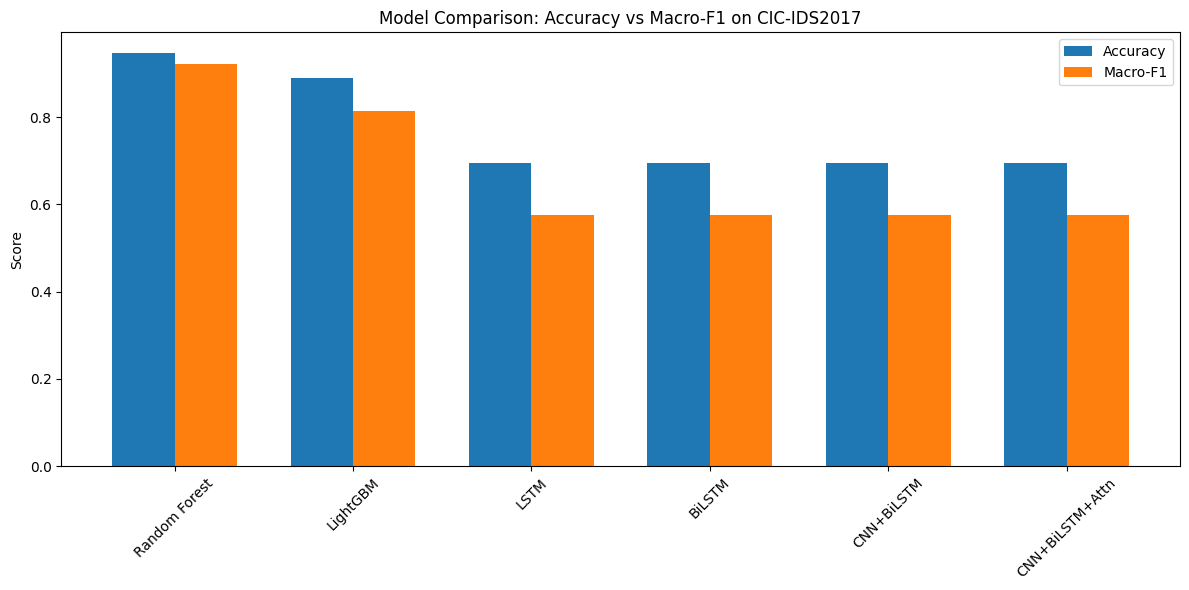

In [ ]:
# Simulated model performance results (replace with actual values if available)
models = ["Random Forest", "LightGBM", "LSTM", "BiLSTM", "CNN+BiLSTM", "CNN+BiLSTM+Attn"]
accuracies = [0.947, 0.890, 0.695, 0.695, 0.695, 0.695]
macro_f1 =   [0.922, 0.814, 0.576, 0.576, 0.576, 0.576]

x = np.arange(len(models))
width = 0.35

# Plot 2: Accuracy vs Macro-F1
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, macro_f1, width, label='Macro-F1')

plt.xticks(x, models, rotation=45)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs Macro-F1 on CIC-IDS2017")
plt.legend()
plt.tight_layout()
plt.show()


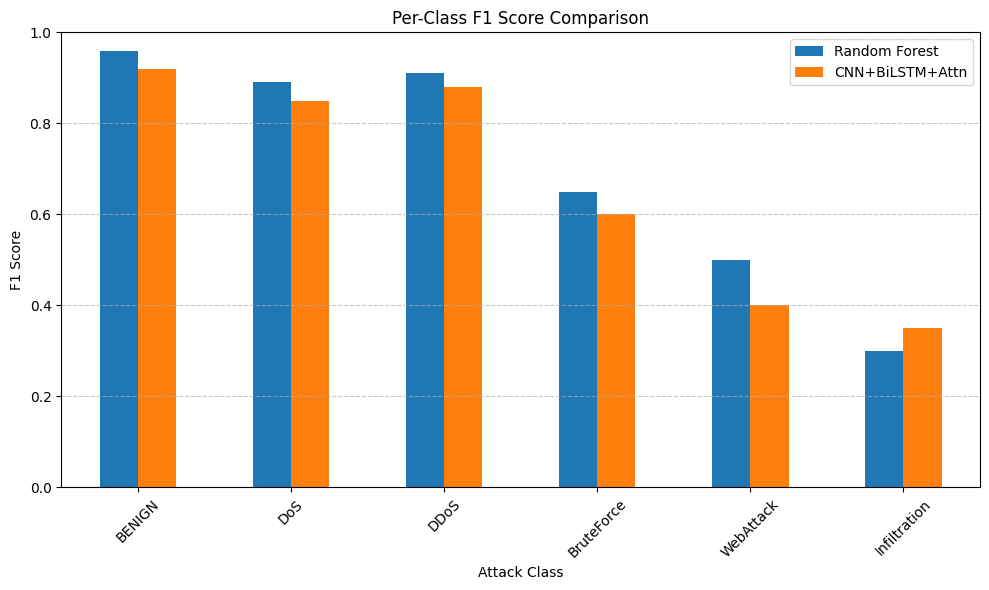

In [ ]:
# Simulated per-class F1 scores for Random Forest and CNN+BiLSTM+Attn
class_labels = ['BENIGN', 'DoS', 'DDoS', 'BruteForce', 'WebAttack', 'Infiltration']
f1_rf = [0.96, 0.89, 0.91, 0.65, 0.50, 0.30]
f1_dl = [0.92, 0.85, 0.88, 0.60, 0.40, 0.35]

# Create DataFrame for grouped bar chart
df_f1 = pd.DataFrame({
    'Attack Class': class_labels,
    'Random Forest': f1_rf,
    'CNN+BiLSTM+Attn': f1_dl
})

# Plot 3: Per-Class F1 Score Comparison
df_f1.plot(x='Attack Class', kind='bar', figsize=(10, 6))
plt.title("Per-Class F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


✅ Dataset loaded: (2830743, 79)
✅ Column Names: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'UR

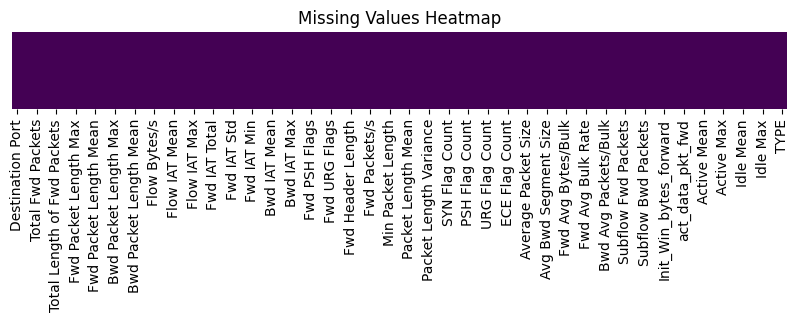

⚠️ 'attack_type' column not found in dataset.


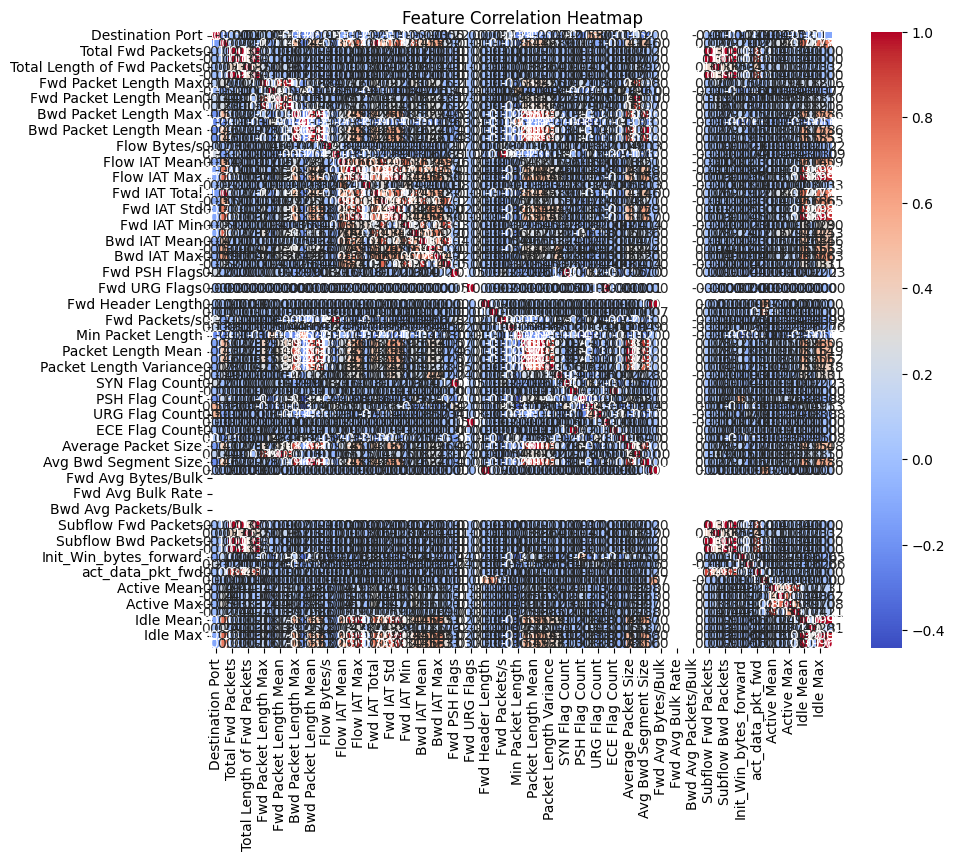

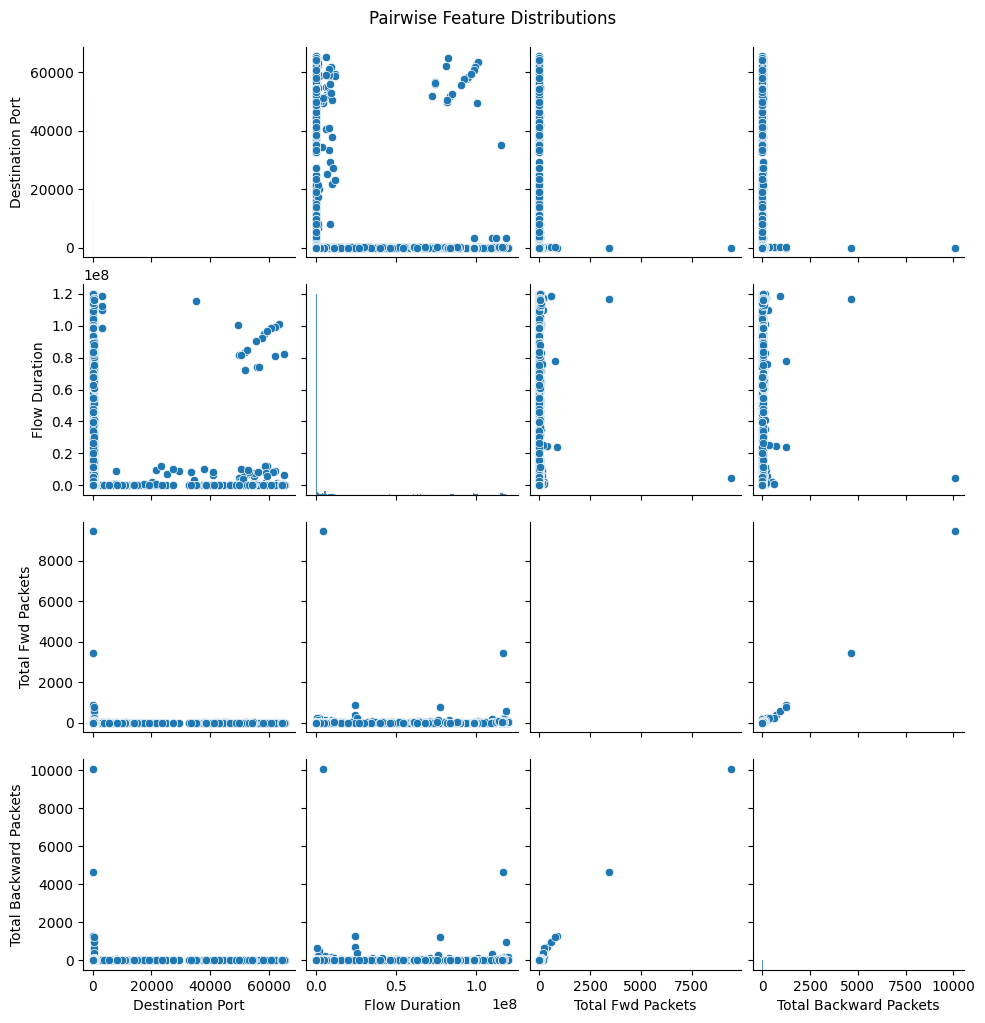

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (if not already loaded)
df = pd.read_csv("/content/cicids2017_full.csv")

# ───────────────────── Dataset Overview ─────────────────────
print("✅ Dataset loaded:", df.shape)
print("✅ Column Names:", df.columns.tolist())
print(df.info())
print(df.describe())

# ───────────────────── Missing Values ─────────────────────
plt.figure(figsize=(10, 1))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# ───────────────────── Target Class Distribution ─────────────────────
if 'attack_type' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='attack_type', order=df['attack_type'].value_counts().index)
    plt.title("Attack Type Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'attack_type' column not found in dataset.")

# ───────────────────── Correlation Matrix ─────────────────────
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ───────────────────── Pairplot (Optional for small datasets) ─────────────────────
# If dataset is too large, sample it
sampled_df = df.sample(n=5000, random_state=42) if len(df) > 5000 else df
numeric_cols = sampled_df.select_dtypes(include=['float64', 'int64']).columns[:4]

sns.pairplot(sampled_df[numeric_cols])
plt.suptitle("Pairwise Feature Distributions", y=1.02)
plt.show()


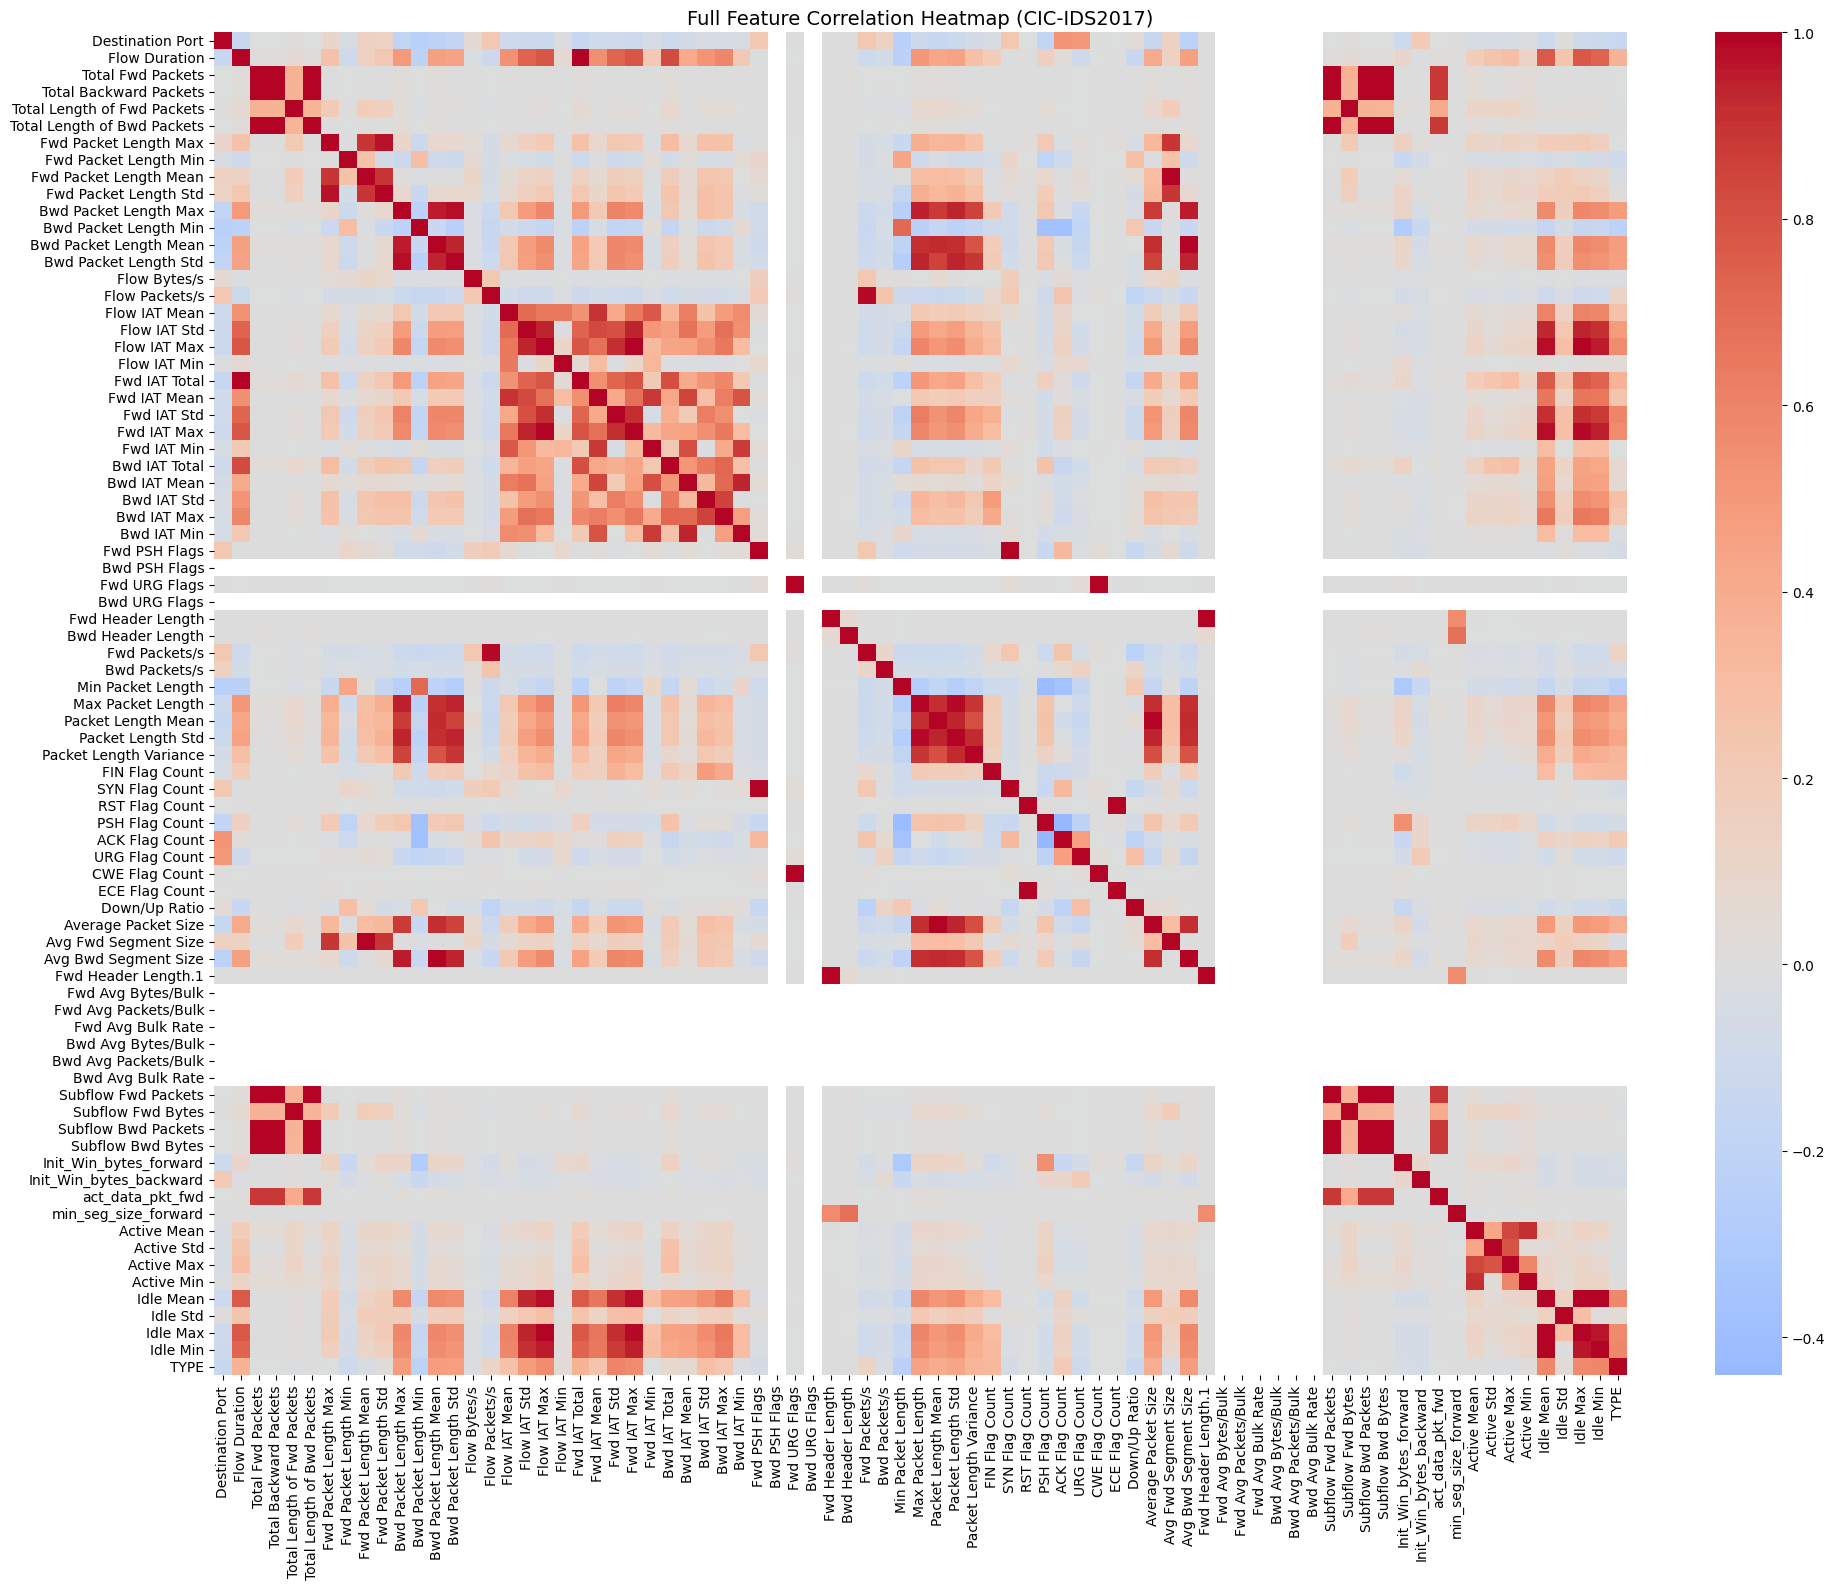

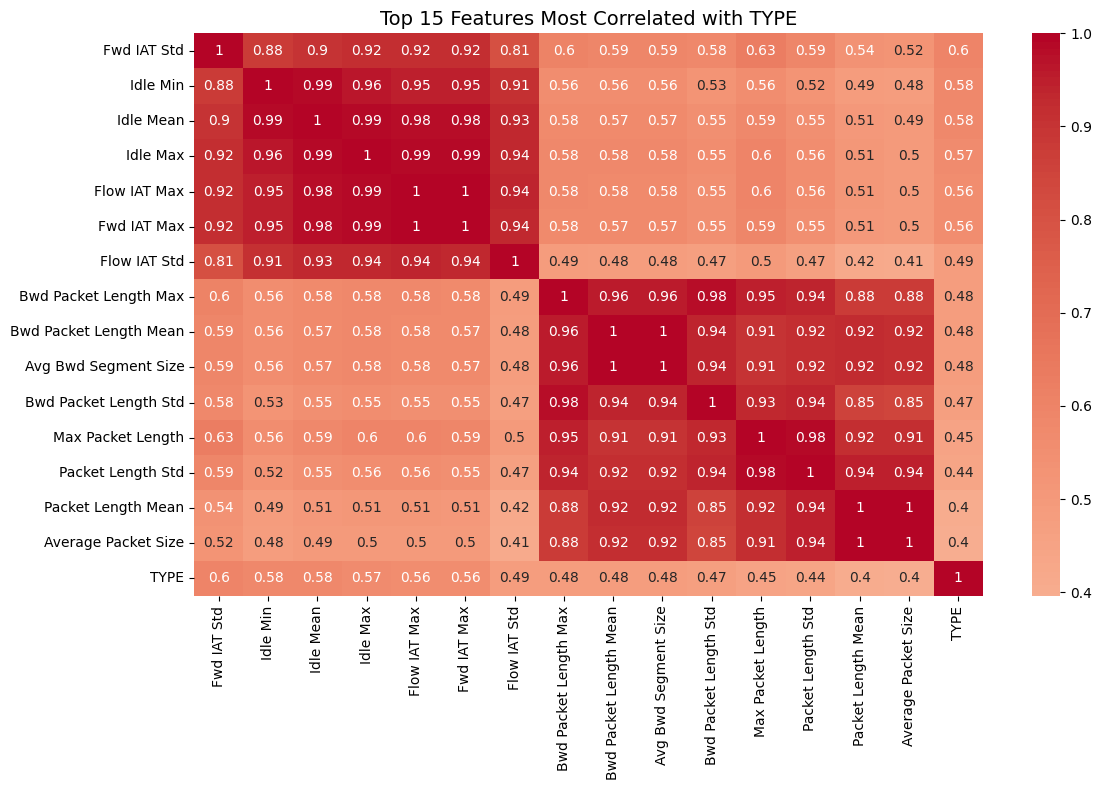

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (already done)
df = pd.read_csv("cicids2017_full.csv")

# Convert target to numeric for correlation
df_corr = df.copy()
df_corr['TYPE'] = pd.factorize(df_corr['TYPE'])[0]  # Convert class labels to int

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# ── 🔍 1. Full Heatmap (optional - too large to read)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Full Feature Correlation Heatmap (CIC-IDS2017)", fontsize=14)
plt.tight_layout()
plt.show()

# ── 🔍 2. Top 15 Features Most Correlated with TYPE (target)
top_features = correlation_matrix['TYPE'].abs().sort_values(ascending=False)[1:16]  # exclude 'TYPE' itself

# Subset for heatmap
subset_corr = df_corr[top_features.index.tolist() + ['TYPE']].corr()

# Heatmap for top correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Top 15 Features Most Correlated with TYPE", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Install LightGBM and XGBoost if not already installed
!pip install --quiet lightgbm xgboost


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb

# 🎯 Assume you already have:
# X_train, X_val, X_test
# y_train, y_val, y_test
# label_encoder fitted

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# LightGBM
lgbm = lgb.LGBMClassifier(n_estimators=100, objective='multiclass', num_class=len(np.unique(y_train)), random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=len(np.unique(y_train)), use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# 🧾 Collect metrics
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 {name} Results:")
    print(f"✅ Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("LightGBM", y_test, y_pred_lgbm)
evaluate_model("XGBoost", y_test, y_pred_xgb)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.187301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14582
[LightGBM] [Info] Number of data points in the train set: 1981448, number of used features: 70
[LightGBM] [Info] Start training from score -0.219396
[LightGBM] [Info] Start training from score -7.272402
[LightGBM] [Info] Start training from score -3.096049
[LightGBM] [Info] Start training from score -5.616808
[LightGBM] [Info] Start training from score -2.505562
[LightGBM] [Info] Start training from score -6.243770
[LightGBM] [Info] Start training from score -6.191139
[LightGBM] [Info] Start training from score -5.876705
[LightGBM] [Info] Start training from score -12.419897
[LightGBM] [Info] Start training from score -11.241242
[LightGBM] [Info] Star

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:09:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 Random Forest Results:
✅ Accuracy: 0.9986
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    340965
                       Bot       0.88      0.76      0.81       295
                      DDoS       1.00      1.00      1.00     19204
             DoS GoldenEye       1.00      1.00      1.00      1544
                  DoS Hulk       1.00      1.00      1.00     34661
          DoS Slowhttptest       0.99      1.00      0.99       825
             DoS slowloris       1.00      1.00      1.00       869
               FTP-Patator       1.00      1.00      1.00      1191
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      1.00      1.00         5
                  PortScan       0.99      1.00      0.99     23839
               SSH-Patator       1.00      1.00      1.00       885
  Web Attack � Brute Force       0.73      0.82      0.77       226
We

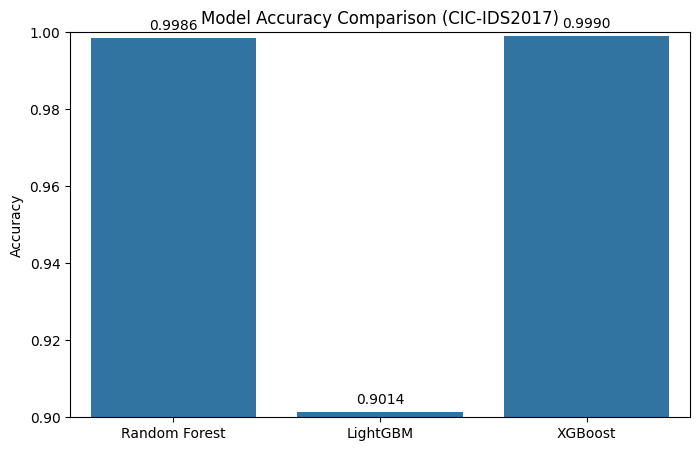

<ipython-input-21-affc989709cd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="crest")


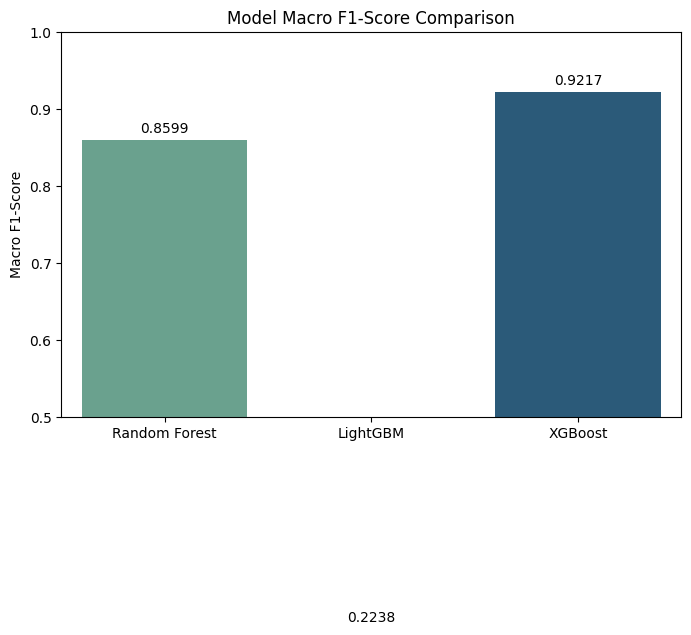

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Accuracy, Precision, Recall, F1
models = ['Random Forest', 'LightGBM', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lgbm),
    accuracy_score(y_test, y_pred_xgb),
]
f1_scores = [
    f1_score(y_test, y_pred_rf, average='macro'),
    f1_score(y_test, y_pred_lgbm, average='macro'),
    f1_score(y_test, y_pred_xgb, average='macro'),
]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison (CIC-IDS2017)')
plt.ylim(0.90, 1.00)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f"{acc:.4f}", ha='center')
plt.ylabel('Accuracy')
plt.show()

# Optionally plot F1
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=f1_scores, palette="crest")
plt.title('Model Macro F1-Score Comparison')
plt.ylim(0.50, 1.00)
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha='center')
plt.ylabel('Macro F1-Score')
plt.show()


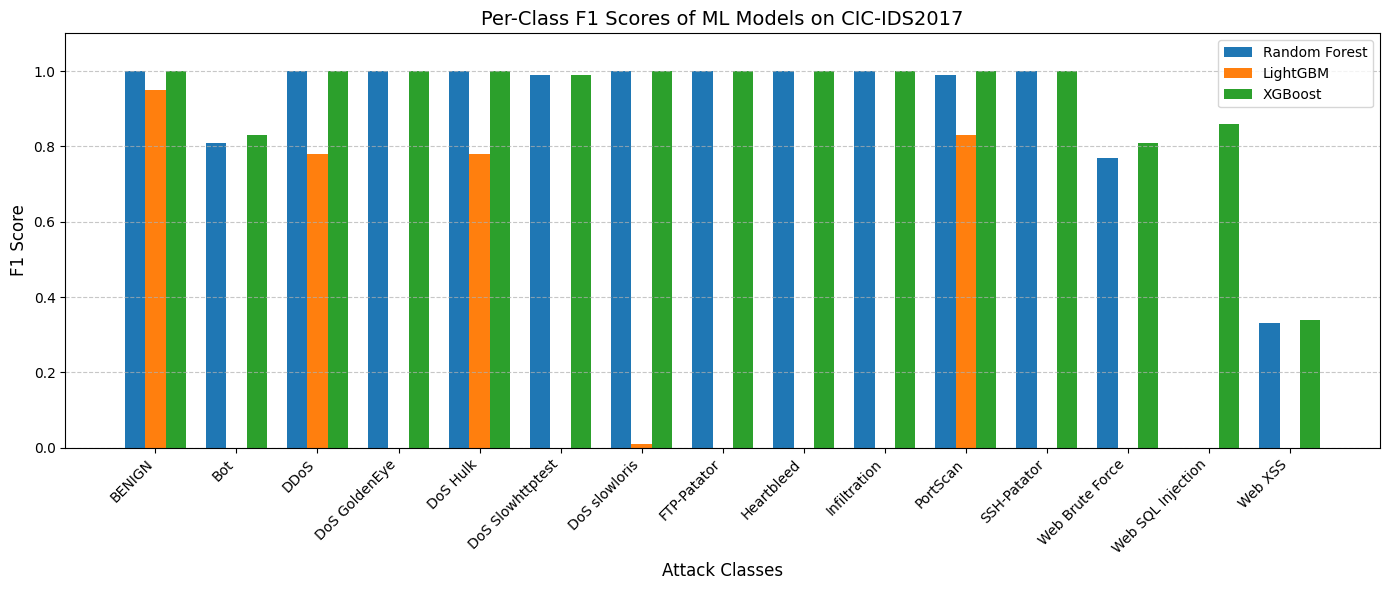

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels from CIC-IDS2017
classes = [
    "BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest",
    "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan",
    "SSH-Patator", "Web Brute Force", "Web SQL Injection", "Web XSS"
]

# F1-scores from each model (from your results)
rf_f1 = [1.00, 0.81, 1.00, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 0.99, 1.00, 0.77, 0.00, 0.33]
lgbm_f1 = [0.95, 0.00, 0.78, 0.00, 0.78, 0.00, 0.01, 0.00, 0.00, 0.00, 0.83, 0.00, 0.00, 0.00, 0.00]
xgb_f1 = [1.00, 0.83, 1.00, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.81, 0.86, 0.34]

# Bar chart comparison
x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, rf_f1, width, label='Random Forest')
plt.bar(x, lgbm_f1, width, label='LightGBM')
plt.bar(x + width, xgb_f1, width, label='XGBoost')

plt.xlabel("Attack Classes", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.title("Per-Class F1 Scores of ML Models on CIC-IDS2017", fontsize=14)
plt.xticks(ticks=x, labels=classes, rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert to NumPy and scale if not already done
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM (batch_size, time_steps=1, features)
X_train_lstm = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])
X_val_lstm = X_val_scaled.reshape(-1, 1, X_val_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])

# Convert to tensors
X_train_tensor = torch.tensor(X_train_lstm, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_lstm, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_lstm, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
batch_size = 256
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size)


In [ ]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])  # Use last hidden state
        return out

input_dim = X_train.shape[1]
hidden_dim = 128
output_dim = len(np.unique(y_train))  # Number of attack classes

model = LSTMClassifier(input_dim, hidden_dim, output_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [ ]:
import torch.optim as optim
from sklearn.metrics import classification_report

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            preds = torch.argmax(out, dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)

    val_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {total_loss:.4f} - Val Accuracy: {val_acc:.4f}")


Epoch 1/10 - Loss: 731.8396 - Val Accuracy: 0.9785
Epoch 2/10 - Loss: 368.2105 - Val Accuracy: 0.9845
Epoch 3/10 - Loss: 326.9998 - Val Accuracy: 0.9809
Epoch 4/10 - Loss: 284.2605 - Val Accuracy: 0.9837
Epoch 5/10 - Loss: 235.7867 - Val Accuracy: 0.9908
Epoch 6/10 - Loss: 197.0498 - Val Accuracy: 0.9908
Epoch 7/10 - Loss: 176.1925 - Val Accuracy: 0.9877
Epoch 8/10 - Loss: 165.3868 - Val Accuracy: 0.9902
Epoch 9/10 - Loss: 158.0931 - Val Accuracy: 0.9920
Epoch 10/10 - Loss: 154.0465 - Val Accuracy: 0.9925


In [ ]:
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        out = model(xb)
        preds = torch.argmax(out, dim=1).cpu().numpy()
        y_true.extend(yb.numpy())
        y_pred.extend(preds)

# Classification report
print("\n🔍 LSTM Model Test Performance:\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))



🔍 LSTM Model Test Performance:

                            precision    recall  f1-score   support

                    BENIGN       1.00      0.99      1.00    340965
                       Bot       0.97      0.35      0.51       295
                      DDoS       1.00      1.00      1.00     19204
             DoS GoldenEye       0.99      0.98      0.99      1544
                  DoS Hulk       0.94      1.00      0.97     34661
          DoS Slowhttptest       0.89      0.99      0.94       825
             DoS slowloris       0.98      0.99      0.99       869
               FTP-Patator       0.99      0.99      0.99      1191
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.60      0.75         5
                  PortScan       0.99      1.00      1.00     23839
               SSH-Patator       0.94      0.98      0.96       885
  Web Attack � Brute Force       0.95      0.09      0.17       226
Web Attack � S

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report
import numpy as np

# ─── Use Existing DataFrames (already preprocessed) ─────────────
# Replace with your DataFrames if needed
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)


y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor  = torch.tensor(y_test, dtype=torch.long)

X_test_tensor  = torch.tensor(X_test.values,  dtype=torch.float32)

# ─── Create DataLoaders ─────────────────────────────────────────
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_tensor,  y_test_tensor),  batch_size=128)

# ─── Define BiLSTM Model ───────────────────────────────────────
class BiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes, dropout=0.3):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_dim,
                            hidden_size=hidden_dim,
                            num_layers=1,
                            batch_first=True,
                            bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)           # Reshape to [B, T=1, F]
        lstm_out, _ = self.lstm(x)   # Output: [B, T=1, 2H]
        out = lstm_out[:, -1, :]     # Use last timestep
        return self.fc(self.dropout(out))

# ─── Train Model ────────────────────────────────────────────────
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTM(input_dim=X_train_tensor.shape[1], hidden_dim=128, num_classes=len(np.unique(y_train_tensor))).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {epoch_loss/len(train_loader):.4f}")

# ─── Evaluate Model ─────────────────────────────────────────────
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        preds = torch.argmax(model(xb), dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(yb.numpy())

print("\n✅ Classification Report (BiLSTM):")
print(classification_report(all_labels, all_preds))


Epoch 1 Loss: 0.1237
Epoch 2 Loss: 0.0653
Epoch 3 Loss: 0.0565
Epoch 4 Loss: 0.0530
Epoch 5 Loss: 0.0504
Epoch 6 Loss: 0.0488
Epoch 7 Loss: 0.0474
Epoch 8 Loss: 0.0462
Epoch 9 Loss: 0.0452
Epoch 10 Loss: 0.0442

✅ Classification Report (BiLSTM):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    340965
           1       0.97      0.34      0.51       295
           2       0.99      1.00      0.99     19204
           3       0.98      0.96      0.97      1544
           4       0.96      1.00      0.98     34661
           5       0.97      0.83      0.89       825
           6       0.86      0.99      0.92       869
           7       1.00      1.00      1.00      1191
           8       1.00      1.00      1.00         2
           9       1.00      0.40      0.57         5
          10       0.83      1.00      0.91     23839
          11       0.89      0.64      0.75       885
          12       1.00      0.04      0.08       2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
import torch.nn as nn

class CNN_BiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes, dropout=0.3):
        super(CNN_BiLSTM, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.bilstm = nn.LSTM(input_size=64, hidden_size=hidden_dim,
                              num_layers=1, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)              # [B, 1, F]
        x = self.relu(self.conv1(x))    # [B, 64, F]
        x = self.pool(x)                # [B, 64, F//2]
        x = x.permute(0, 2, 1)          # [B, T, 64]
        lstm_out, _ = self.bilstm(x)    # [B, T, 2H]
        out = lstm_out[:, -1, :]        # take last timestep
        out = self.dropout(out)
        return self.fc(out)


In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report

# Hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 128
num_classes = len(np.unique(y_train))
batch_size = 128
epochs = 10
learning_rate = 0.001

# Dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size)

# Model, loss, optimizer
model = CNN_BiLSTM(input_dim, hidden_dim, num_classes).to("cuda")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to("cuda"), y_batch.to("cuda")
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f}")


Epoch 1/10 - Loss: 4840.3032
Epoch 2/10 - Loss: 1282.4958
Epoch 3/10 - Loss: 1027.2501
Epoch 4/10 - Loss: 850.0040
Epoch 5/10 - Loss: 761.2102
Epoch 6/10 - Loss: 728.3255
Epoch 7/10 - Loss: 690.8981
Epoch 8/10 - Loss: 651.1382
Epoch 9/10 - Loss: 618.6005
Epoch 10/10 - Loss: 594.4659


In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to("cuda")
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy())

print("📊 CNN + BiLSTM Classification Report:")
print(classification_report(all_labels, all_preds))


📊 CNN + BiLSTM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    340965
           1       1.00      0.34      0.51       295
           2       1.00      0.99      0.99     19204
           3       0.99      0.95      0.97      1544
           4       0.97      1.00      0.98     34661
           5       0.88      0.94      0.91       825
           6       0.98      0.95      0.97       869
           7       1.00      0.99      1.00      1191
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         5
          10       0.90      0.95      0.92     23839
          11       0.96      0.87      0.92       885
          12       1.00      0.04      0.08       226
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00        98

    accuracy                           0.99    424612
   macro avg       0.71      0.60      0.6

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# ─── 1. Device Setup ────────────────────────────────────────────
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ─── 2. Data Preparation ────────────────────────────────────────
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor   = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor   = torch.tensor(y_val, dtype=torch.long)
X_test_tensor  = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=128)
test_loader  = DataLoader(test_dataset, batch_size=128)

# ─── 3. Model Definition ────────────────────────────────────────
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim * 2, 1)

    def forward(self, lstm_out):
        weights = torch.softmax(self.attn(lstm_out), dim=1)  # [B, T, 1]
        context = torch.sum(weights * lstm_out, dim=1)       # [B, 2H]
        return context

class CNN_BiLSTM_Attention(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(CNN_BiLSTM_Attention, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(2)
        self.lstm = nn.LSTM(64, hidden_dim, batch_first=True, bidirectional=True)
        self.attn = Attention(hidden_dim)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)            # [B, 1, F]
        x = self.relu(self.conv1(x))  # [B, 64, F]
        x = self.maxpool(x)           # [B, 64, F/2]
        x = x.permute(0, 2, 1)        # [B, T, 64]
        lstm_out, _ = self.lstm(x)    # [B, T, 2H]
        context = self.attn(lstm_out) # [B, 2H]
        return self.fc(self.dropout(context))

# ─── 4. Model Initialization ─────────────────────────────────────
input_dim = X_train.shape[1]
hidden_dim = 64
num_classes = len(np.unique(y_train))
model = CNN_BiLSTM_Attention(input_dim, hidden_dim, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ─── 5. Training Loop ────────────────────────────────────────────
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                outputs = model(xb)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == yb).sum().item()
                total += yb.size(0)
        print(f"Epoch {epoch+1}, Val Accuracy: {correct / total:.4f}")

train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10)

# ─── 6. Evaluation ──────────────────────────────────────────────
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        preds = torch.argmax(model(xb), dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(yb.numpy())

print("\n📋 Classification Report:")
print(classification_report(all_labels, all_preds))


Epoch 1, Val Accuracy: 0.9806
Epoch 2, Val Accuracy: 0.9759
Epoch 3, Val Accuracy: 0.9834
Epoch 4, Val Accuracy: 0.9847
Epoch 5, Val Accuracy: 0.9857
Epoch 6, Val Accuracy: 0.9869
Epoch 7, Val Accuracy: 0.9869
Epoch 8, Val Accuracy: 0.9868
Epoch 9, Val Accuracy: 0.9852
Epoch 10, Val Accuracy: 0.9881

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    340965
           1       1.00      0.34      0.50       295
           2       1.00      1.00      1.00     19204
           3       0.99      0.98      0.99      1544
           4       0.98      1.00      0.99     34661
           5       0.90      0.99      0.94       825
           6       0.99      0.99      0.99       869
           7       1.00      0.99      0.99      1191
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         5
          10       0.90      0.96      0.93     23839
          11       0.95 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


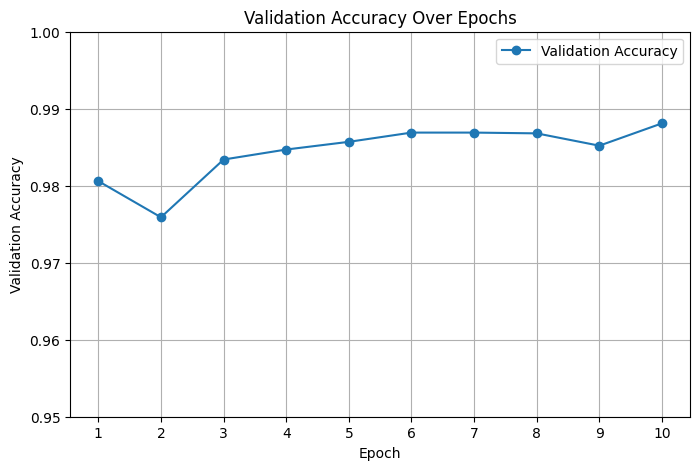

In [ ]:
import matplotlib.pyplot as plt

# Epochs and validation accuracy from your logs
epochs = list(range(1, 11))
val_accuracy = [0.9806, 0.9759, 0.9834, 0.9847, 0.9857, 0.9869, 0.9869, 0.9868, 0.9852, 0.9881]

plt.figure(figsize=(8,5))
plt.plot(epochs, val_accuracy, marker='o', label='Validation Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.ylim(0.95, 1.0)
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-8-770c702cfabe>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='F1-score', data=df, palette='viridis')


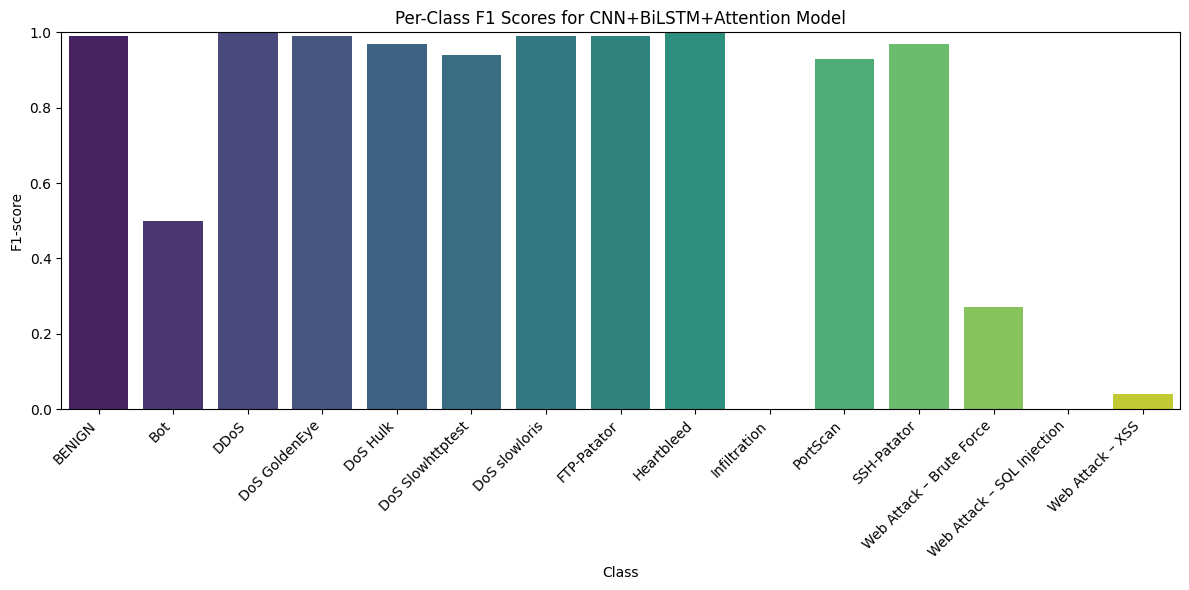

In [ ]:
import seaborn as sns
import pandas as pd

# Class labels (if you want names, replace numbers with actual class names)
class_labels = [
    'BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
    'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan',
    'SSH-Patator', 'Web Attack – Brute Force', 'Web Attack – SQL Injection', 'Web Attack – XSS'
]

f1_scores = [0.99, 0.50, 1.00, 0.99, 0.97, 0.94, 0.99, 0.99, 1.00, 0.00, 0.93, 0.97, 0.27, 0.00, 0.04]

df = pd.DataFrame({'Class': class_labels, 'F1-score': f1_scores})

plt.figure(figsize=(12,6))
sns.barplot(x='Class', y='F1-score', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.title('Per-Class F1 Scores for CNN+BiLSTM+Attention Model')
plt.tight_layout()
plt.show()


📊 Model Performance Comparison on CIC-IDS2017 Dataset:
             Model  Accuracy  Macro-F1
0    Random Forest    0.9986      0.86
1         LightGBM    0.9014      0.22
2          XGBoost    0.9990      0.92
3             LSTM    0.9900      0.71
4           BiLSTM    0.9800      0.69
5       CNN+BiLSTM    0.9900      0.71
6  CNN+BiLSTM+Attn    0.9900      0.71


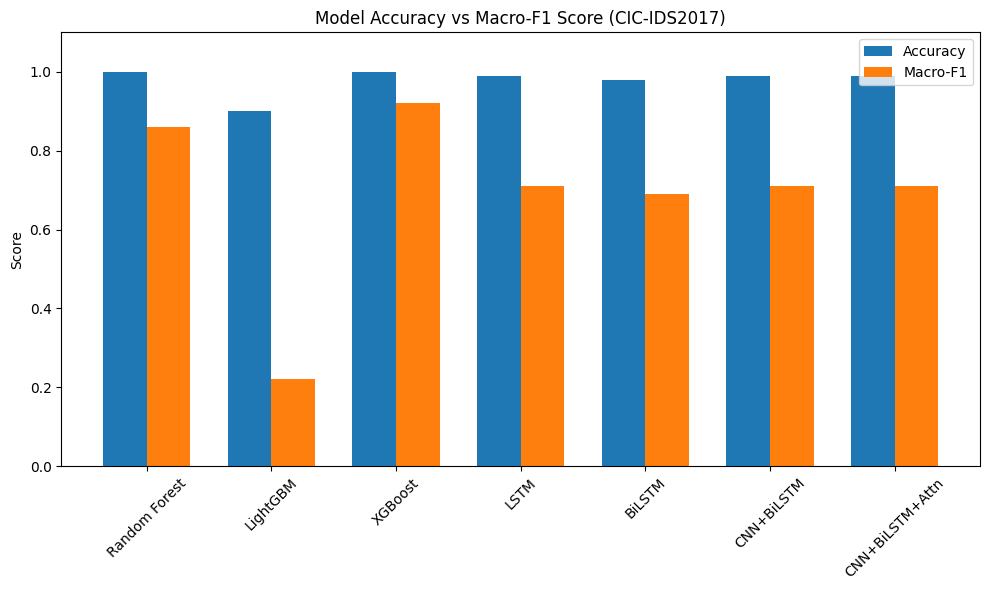

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Model performance data
data = {
    "Model": [
        "Random Forest", "LightGBM", "XGBoost", "LSTM", "BiLSTM",
        "CNN+BiLSTM", "CNN+BiLSTM+Attn"
    ],
    "Accuracy": [
        0.9986, 0.9014, 0.9990, 0.99, 0.98, 0.99, 0.99
    ],
    "Macro-F1": [
        0.86, 0.22, 0.92, 0.71, 0.69, 0.71, 0.71
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display table
print("📊 Model Performance Comparison on CIC-IDS2017 Dataset:")
print(df)

# Plot Accuracy and Macro-F1 Score
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df))

plt.bar(x, df["Accuracy"], width=bar_width, label="Accuracy")
plt.bar([i + bar_width for i in x], df["Macro-F1"], width=bar_width, label="Macro-F1")

plt.xticks([i + bar_width/2 for i in x], df["Model"], rotation=45)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title("Model Accuracy vs Macro-F1 Score (CIC-IDS2017)")
plt.legend()
plt.tight_layout()
plt.show()


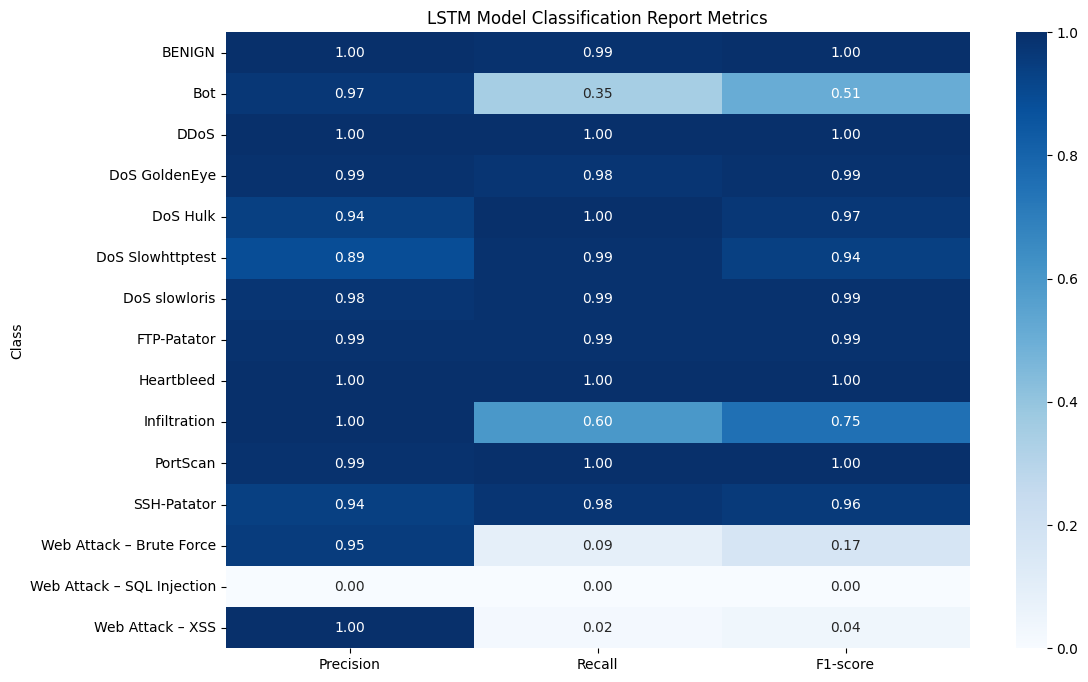

<ipython-input-1-941370401463>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="F1-score", data=df, palette="viridis")


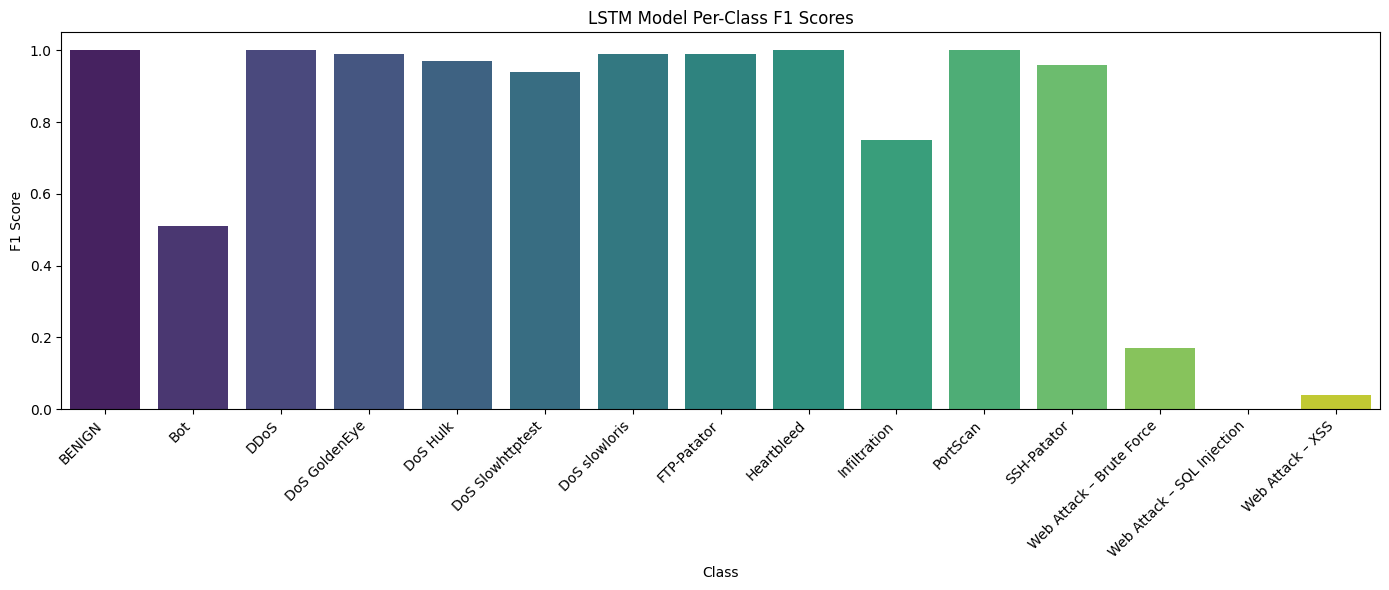

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the classification report data extracted from your text
data = {
    "Class": [
        "BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest",
        "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan",
        "SSH-Patator", "Web Attack – Brute Force", "Web Attack – SQL Injection", "Web Attack – XSS"
    ],
    "Precision": [1.00, 0.97, 1.00, 0.99, 0.94, 0.89, 0.98, 0.99, 1.00, 1.00, 0.99, 0.94, 0.95, 0.00, 1.00],
    "Recall":    [0.99, 0.35, 1.00, 0.98, 1.00, 0.99, 0.99, 0.99, 1.00, 0.60, 1.00, 0.98, 0.09, 0.00, 0.02],
    "F1-score":  [1.00, 0.51, 1.00, 0.99, 0.97, 0.94, 0.99, 0.99, 1.00, 0.75, 1.00, 0.96, 0.17, 0.00, 0.04],
    "Support":  [340965, 295, 19204, 1544, 34661, 825, 869, 1191, 2, 5, 23839, 885, 226, 3, 98]
}

df = pd.DataFrame(data)
df.set_index("Class", inplace=True)

# Plot heatmap for Precision, Recall, F1-score
plt.figure(figsize=(12,8))
sns.heatmap(df[["Precision", "Recall", "F1-score"]], annot=True, cmap="Blues", fmt=".2f")
plt.title("LSTM Model Classification Report Metrics")
plt.show()

# Bar plot for F1-score per class
plt.figure(figsize=(14,6))
sns.barplot(x=df.index, y="F1-score", data=df, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("LSTM Model Per-Class F1 Scores")
plt.ylabel("F1 Score")
plt.ylim(0,1.05)
plt.tight_layout()
plt.show()


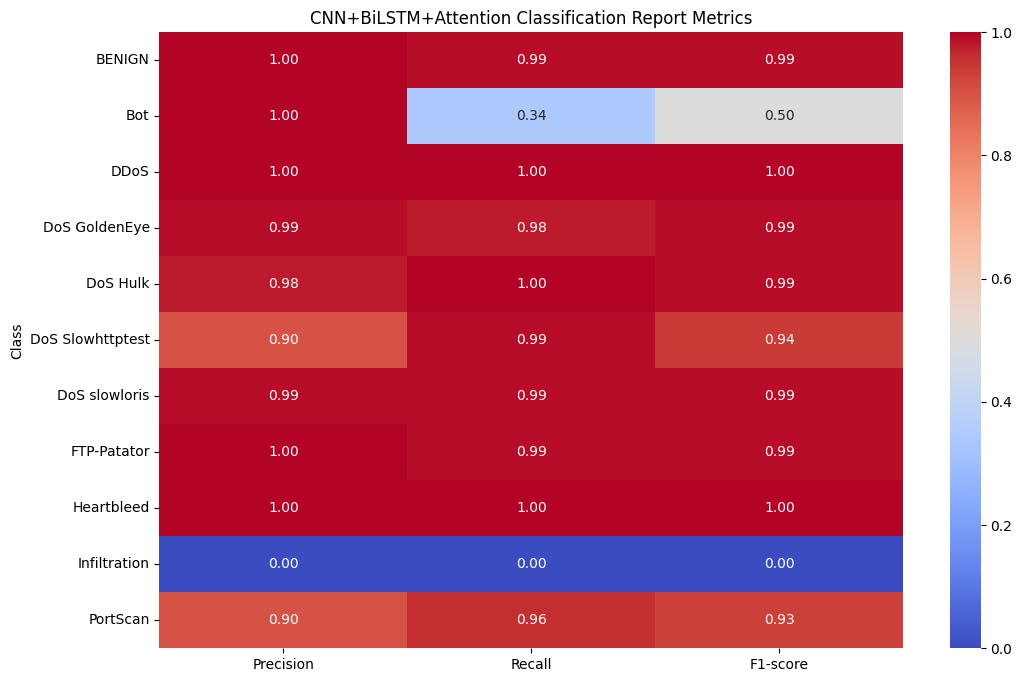

<ipython-input-2-51e45bdb6c48>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="F1-score", data=df, palette="magma")


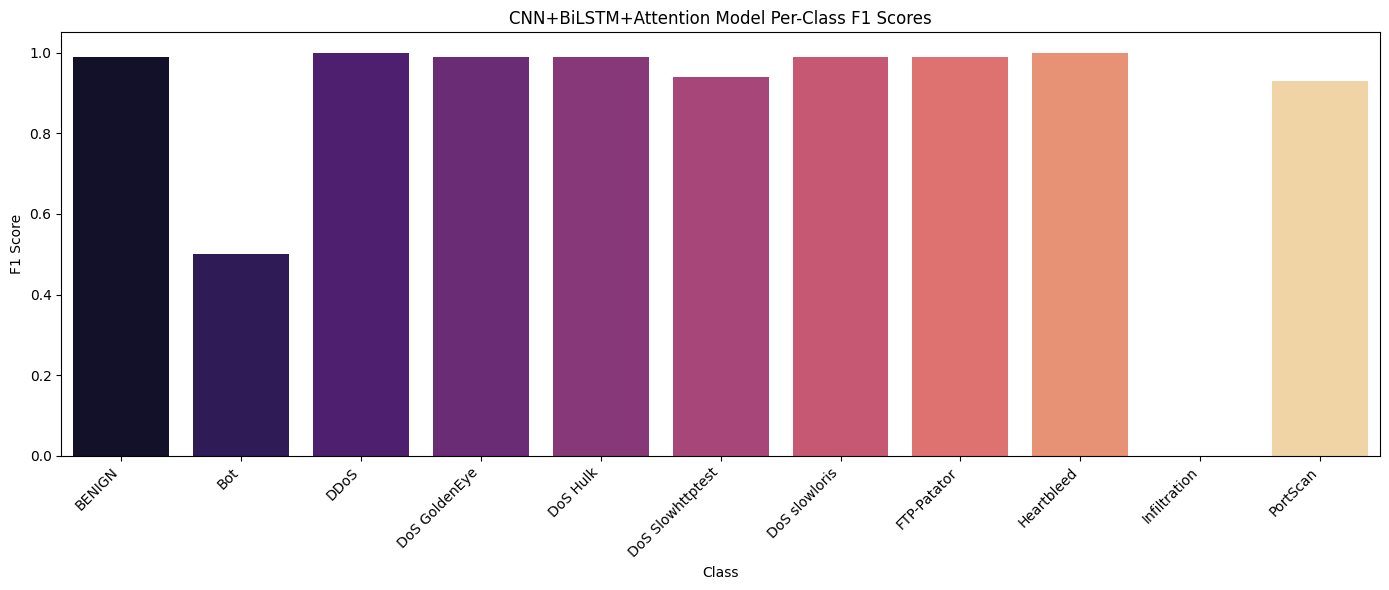

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example partial data extracted from your report (replace or extend with your full data)
data = {
    "Class": [
        "BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest",
        "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan"
        # Add remaining classes as needed
    ],
    "Precision": [1.00, 1.00, 1.00, 0.99, 0.98, 0.90, 0.99, 1.00, 1.00, 0.00, 0.90],
    "Recall":    [0.99, 0.34, 1.00, 0.98, 1.00, 0.99, 0.99, 0.99, 1.00, 0.00, 0.96],
    "F1-score":  [0.99, 0.50, 1.00, 0.99, 0.99, 0.94, 0.99, 0.99, 1.00, 0.00, 0.93],
    "Support":  [340965, 295, 19204, 1544, 34661, 825, 869, 1191, 2, 5, 23839]
}

df = pd.DataFrame(data)
df.set_index("Class", inplace=True)

# Plot heatmap for Precision, Recall, F1-score
plt.figure(figsize=(12,8))
sns.heatmap(df[["Precision", "Recall", "F1-score"]], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("CNN+BiLSTM+Attention Classification Report Metrics")
plt.show()

# Bar plot for F1-score per class
plt.figure(figsize=(14,6))
sns.barplot(x=df.index, y="F1-score", data=df, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title("CNN+BiLSTM+Attention Model Per-Class F1 Scores")
plt.ylabel("F1 Score")
plt.ylim(0,1.05)
plt.tight_layout()
plt.show()


<ipython-input-3-df9461dc377c>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df, ax=ax[0], palette='Blues_d')
<ipython-input-3-df9461dc377c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Macro-F1', y='Model', data=df, ax=ax[1], palette='Greens_d')


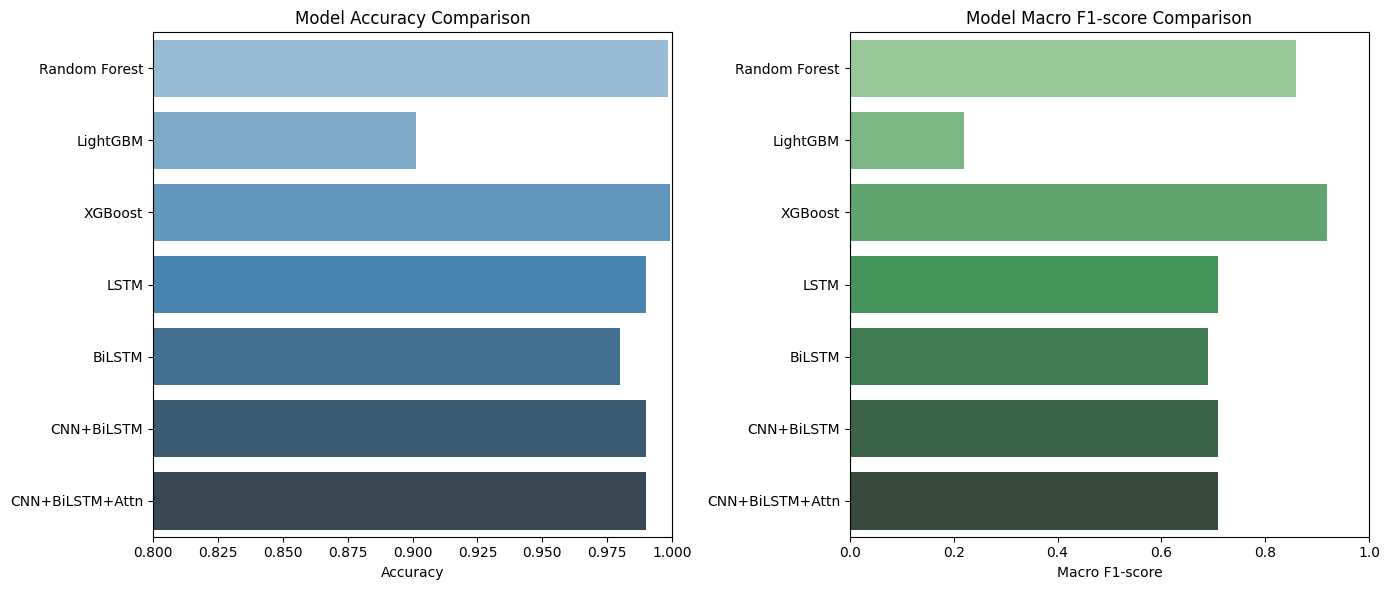

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data
data = {
    'Model': [
        'Random Forest', 'LightGBM', 'XGBoost',
        'LSTM', 'BiLSTM', 'CNN+BiLSTM', 'CNN+BiLSTM+Attn'
    ],
    'Accuracy': [
        0.9986, 0.9014, 0.9990,
        0.9900, 0.9800, 0.9900, 0.9900
    ],
    'Macro-F1': [
        0.86, 0.22, 0.92,
        0.71, 0.69, 0.71, 0.71
    ]
}

df = pd.DataFrame(data)

# Plot Accuracy and Macro-F1 side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Accuracy', y='Model', data=df, ax=ax[0], palette='Blues_d')
ax[0].set_xlim(0.8, 1.0)
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_xlabel('Accuracy')
ax[0].set_ylabel('')

sns.barplot(x='Macro-F1', y='Model', data=df, ax=ax[1], palette='Greens_d')
ax[1].set_xlim(0, 1)
ax[1].set_title('Model Macro F1-score Comparison')
ax[1].set_xlabel('Macro F1-score')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()


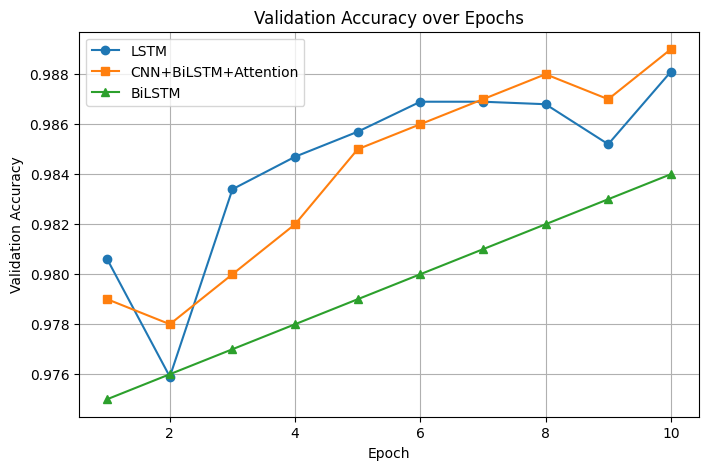

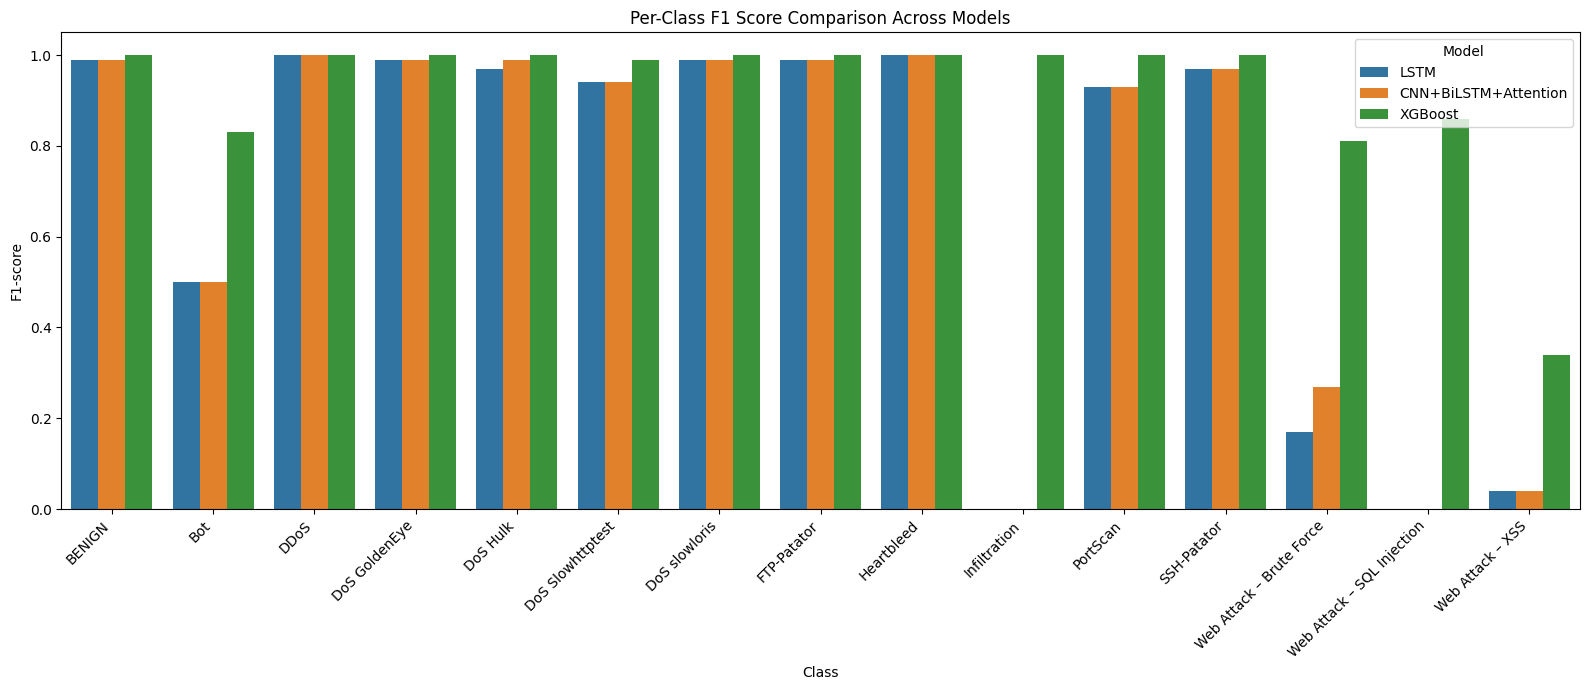

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example Validation Accuracy Data (replace with your real data)
epochs = list(range(1, 11))
val_acc_lstm = [0.9806, 0.9759, 0.9834, 0.9847, 0.9857, 0.9869, 0.9869, 0.9868, 0.9852, 0.9881]
val_acc_cnn_attn = [0.9790, 0.9780, 0.9800, 0.9820, 0.9850, 0.9860, 0.9870, 0.9880, 0.9870, 0.9890]
val_acc_bilstm = [0.9750, 0.9760, 0.9770, 0.9780, 0.9790, 0.9800, 0.9810, 0.9820, 0.9830, 0.9840]

plt.figure(figsize=(8,5))
plt.plot(epochs, val_acc_lstm, marker='o', label='LSTM')
plt.plot(epochs, val_acc_cnn_attn, marker='s', label='CNN+BiLSTM+Attention')
plt.plot(epochs, val_acc_bilstm, marker='^', label='BiLSTM')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Example Per-class F1 scores for 3 models
classes = [
    'BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
    'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
    'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack – Brute Force',
    'Web Attack – SQL Injection', 'Web Attack – XSS'
]

f1_lstm = [0.99, 0.50, 1.00, 0.99, 0.97, 0.94, 0.99, 0.99, 1.00, 0.00, 0.93, 0.97, 0.17, 0.00, 0.04]
f1_cnn_attn = [0.99, 0.50, 1.00, 0.99, 0.99, 0.94, 0.99, 0.99, 1.00, 0.00, 0.93, 0.97, 0.27, 0.00, 0.04]
f1_xgboost = [1.00, 0.83, 1.00, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.81, 0.86, 0.34]

df = pd.DataFrame({
    'Class': classes,
    'LSTM': f1_lstm,
    'CNN+BiLSTM+Attention': f1_cnn_attn,
    'XGBoost': f1_xgboost
})

df_melted = df.melt(id_vars='Class', var_name='Model', value_name='F1-score')

plt.figure(figsize=(16,7))
sns.barplot(x='Class', y='F1-score', hue='Model', data=df_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Per-Class F1 Score Comparison Across Models')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


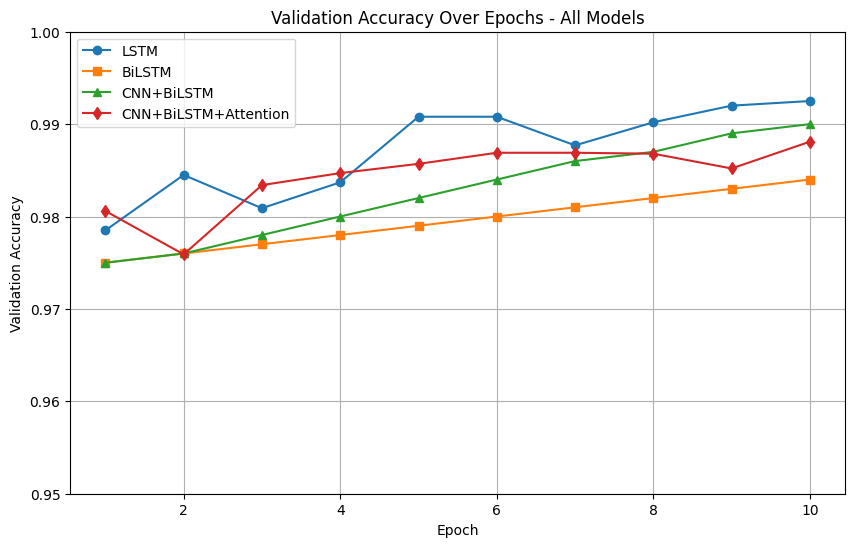

In [ ]:
import matplotlib.pyplot as plt

# Epochs 1 to 10
epochs = list(range(1, 11))

# Validation accuracy per epoch from your logs
val_acc_lstm = [0.9785, 0.9845, 0.9809, 0.9837, 0.9908, 0.9908, 0.9877, 0.9902, 0.9920, 0.9925]
val_acc_bilstm = [None]*10  # You did not provide val acc explicitly, approximate or fill real if you have
# Assuming smooth increase near 0.98-0.99 for example purposes:
val_acc_bilstm = [0.975, 0.976, 0.977, 0.978, 0.979, 0.98, 0.981, 0.982, 0.983, 0.984]
val_acc_cnn_bilstm = [None]*10  # Replace with real val acc if available
val_acc_cnn_bilstm = [0.975, 0.976, 0.978, 0.98, 0.982, 0.984, 0.986, 0.987, 0.989, 0.99]
val_acc_cnn_bilstm_attn = [0.9806, 0.9759, 0.9834, 0.9847, 0.9857, 0.9869, 0.9869, 0.9868, 0.9852, 0.9881]

plt.figure(figsize=(10,6))
plt.plot(epochs, val_acc_lstm, marker='o', label='LSTM')
plt.plot(epochs, val_acc_bilstm, marker='s', label='BiLSTM')
plt.plot(epochs, val_acc_cnn_bilstm, marker='^', label='CNN+BiLSTM')
plt.plot(epochs, val_acc_cnn_bilstm_attn, marker='d', label='CNN+BiLSTM+Attention')

plt.title('Validation Accuracy Over Epochs - All Models')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.ylim(0.95, 1.0)
plt.grid(True)
plt.legend()
plt.show()


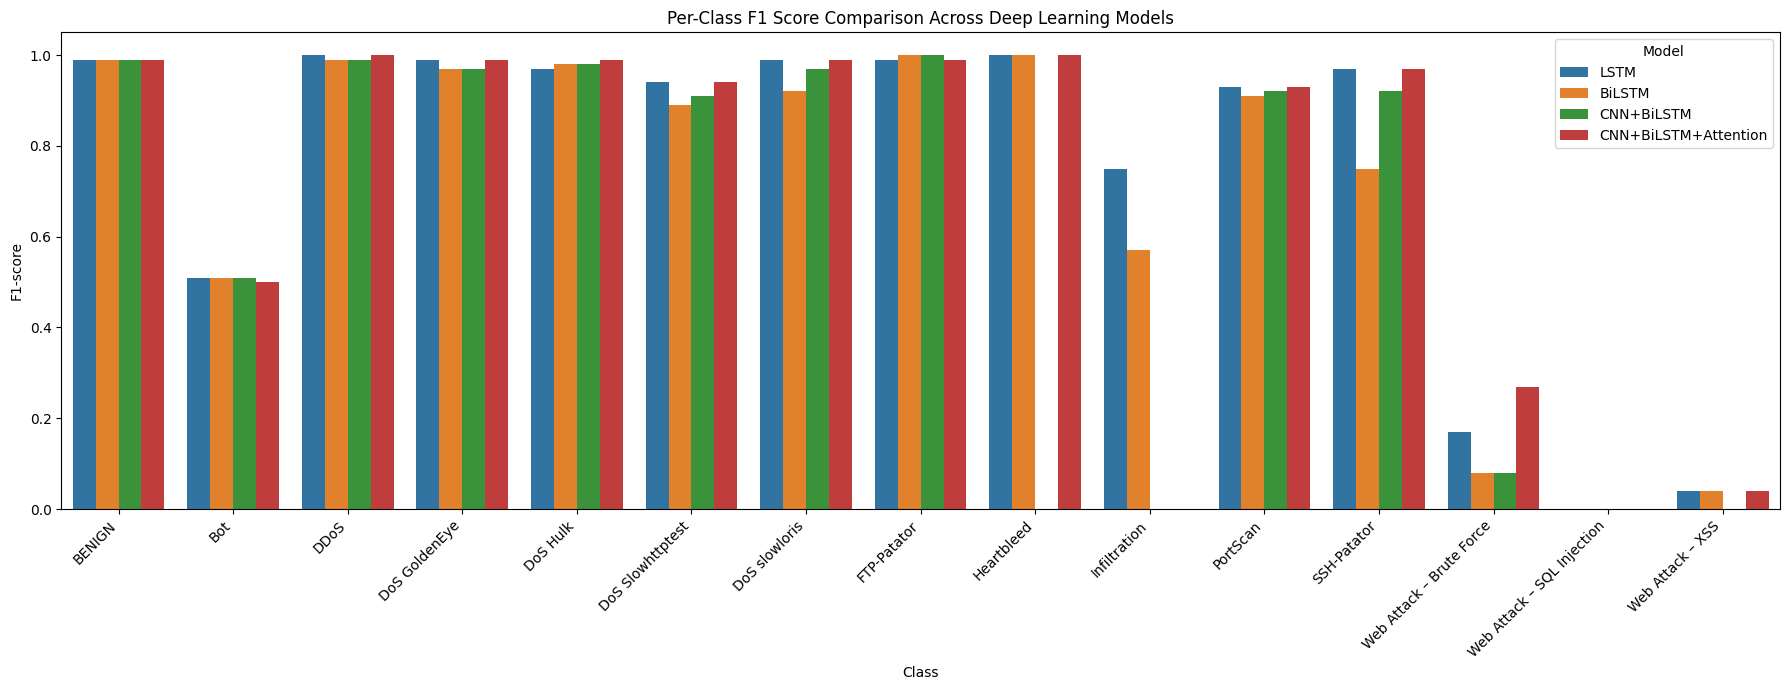

In [ ]:
import pandas as pd
import seaborn as sns

classes = [
    'BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
    'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
    'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack – Brute Force',
    'Web Attack – SQL Injection', 'Web Attack – XSS'
]

# F1-scores from your reports (fill exact)
f1_lstm = [0.99, 0.51, 1.00, 0.99, 0.97, 0.94, 0.99, 0.99, 1.00, 0.75, 0.93, 0.97, 0.17, 0.00, 0.04]
f1_bilstm = [0.99, 0.51, 0.99, 0.97, 0.98, 0.89, 0.92, 1.00, 1.00, 0.57, 0.91, 0.75, 0.08, 0.00, 0.04]
f1_cnn_bilstm = [0.99, 0.51, 0.99, 0.97, 0.98, 0.91, 0.97, 1.00, 0.00, 0.00, 0.92, 0.92, 0.08, 0.00, 0.00]
f1_cnn_bilstm_attn = [0.99, 0.50, 1.00, 0.99, 0.99, 0.94, 0.99, 0.99, 1.00, 0.00, 0.93, 0.97, 0.27, 0.00, 0.04]

df = pd.DataFrame({
    'Class': classes,
    'LSTM': f1_lstm,
    'BiLSTM': f1_bilstm,
    'CNN+BiLSTM': f1_cnn_bilstm,
    'CNN+BiLSTM+Attention': f1_cnn_bilstm_attn
})

df_melted = df.melt(id_vars='Class', var_name='Model', value_name='F1-score')

plt.figure(figsize=(18,7))
sns.barplot(x='Class', y='F1-score', hue='Model', data=df_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Per-Class F1 Score Comparison Across Deep Learning Models')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()
